<a href="https://colab.research.google.com/github/GuadalupeLopezAsc/Machine_learning_models/blob/main/Riego_de_inclumplimiento_crediticio_de_la_vivienda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center> **Universidad Nacional Autonoma de México.** </center></h1>
# <h3><center> **Facultad de Estudios Superiores Acatlán.** </center></h3>
# <h4><center> **Actuaria.** </center></h4>
# <h3><center>*Analisis de Regresión.*</center></h3>
---

# <center> *Riesgo de incumplimiento crediticio de la vivienda* </center>

---
Elaborado por:
  * López Ascencio Guadalupe


# ***Detalles del Proyecto***

**Objetivo del Trabajo:**

Construir, analizar y determinar qué modelo de clasificación supervisada es el más eficiente con el fin de determinar qué clientes son los más propensos a no realizar el pago correspondiente por alguna dificultad……

**Resumen:**

Este proyecto tiene la finalidad de dar un informe del tratamiento y uso de una serie de registros de datos históricos de solicitudes de préstamos; también ver el uso de ciertas metodologías revisadas e vista durante el curso de **“Analisis de Regresion 2024-2”** para dar un prueba de los aprendido de esta materia y una solides del proyecto.

**Introducción:**

Para este proyecto vamos a ver una problemática  muy interesante que es muy frecuente en los préstamos crediticios; **¿Por qué no nos pagan los deudores?**

La pregunta sonara ambigua en todo los sentidos pero es una problemática que afectar a las instituciones que se dedica a las prestamos. Partiendo de que un préstamo hipotecario es aquel que apela a una hipoteca para garantizar el cumplimiento de la obligación. Se trata de un préstamo bancario en el cual la persona que acude a solicitar dinero (el prestatario) pone un bien inmueble como garantía: si no cumple con su obligación de pago, de este modo, el banco puede ejecutar la hipoteca y quedarse con la vivienda.

Por lo que vamos a ver la problemática de la compañía **“Home Credit”** que en su esfuerzo de ampliar las oportunidades de agregar nuevos clientes que no tiene acceso a un sistema financiero convencional y/o por causa de su historia crediticios; sin dejar a un lado el hecho de que dicha población se puede aprovechar de esta situacion por sus poca confiabilidad……

Estas base de datos y la informacion de la problematica lo encontramos y extragimos de las siguientes enlaces:

*   [Kaggle, "Riesgo de impago de crédito hipotecario"](https://www.kaggle.com/c/home-credit-default-risk/data)

*   [Github, "Home Credit Default Risk"](https://github.com/obrunet/Kaggle_kernels_2019/blob/master/Home-Credit/Kaggle/Home_credit_default_risk.ipynb)

# ***Analisis de datos***

**Librerías**

In [ ]:
# Análisis
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Solicitud a sitios web
import requests
from io import BytesIO

# Otros
import random

En la siguiente celda establecemos una configuracion inicial para la visualizacion de la base de datos que vamos a estar limpiando acontinuacion....

In [ ]:
# Configuraciones
pd.set_option('display.max_rows', None) # se mostrarán todas las filas
pd.set_option('display.max_columns', None) # se mostrarán todas las columnas
pd.set_option('display.max_colwidth', None) # se mostrará todo el contenido de cada columna sin importar el ancho

Vamos a tomar acceso a unas ligas donde esta almacenado nuestra base de datos y con el "for" estariamos agrupando y almacenando la infomacion de los registros de la solicitud de los prestamistas en una dataframe llamado: **"app_data"**

In [ ]:
# URL del archivo Parquet sin formato
url1 = 'https://github.com/ericku2101/regresion_logistica/raw/main/application_data01.parquet'
url2 = 'https://github.com/ericku2101/regresion_logistica/raw/main/application_data02.parquet'
url3 = 'https://github.com/ericku2101/regresion_logistica/raw/main/application_data03.parquet'

app_data = pd.DataFrame()

for url in [url1, url2, url3]:
  # Realizar una solicitud para obtener el archivo Parquet
  r = requests.get(url)
  if r.status_code == 200:
      # Si la solicitud tiene éxito, lea el contenido de la respuesta.
      data = BytesIO(r.content)
      # Usa pandas para leer el archivo Parquet desde una secuencia binaria
      df = pd.read_parquet(data)
      # Marcos de datos que sera concatenado por filas
      app_data = pd.concat([app_data, df], axis=0)
  else:
      print(f"Failed to download the file: HTTP {r.status_code}")

In [ ]:
app_data.head()   # visualizamos el dataframe para notar como se conforma

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Descripción del Dataset**  \\
Para este punto uno se preguntó; ¿Qué nos quiere decir cada una de las columnas y que nos representa?.

Este bloque de código intenta leer un archivo CSV desde una URL y luego muestra las filas del DataFrame resultante donde el valor de la columna **"Table"** sea igual a **"application_data"** si es que la informacion esta en diferente formato...

In [ ]:
url = "https://raw.githubusercontent.com/ericku2101/regresion_logistica/main/columns_description.csv"
try:
    descripcion = pd.read_csv(url, encoding='utf-8').query("Table == 'application_data'")
    display(descripcion)
except UnicodeDecodeError:
    descripcion = pd.read_csv(url, encoding='iso-8859-1').query("Table == 'application_data'")
    display(descripcion)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


las columnas nos interesa a enterder son las ultimas 2 ***("descripcion" e "especial")*** ya que nos indica como se recolectaron, definieron y trataron de los datos previos al analisis. Pasando a otra parte veamos las dimensiones del dataframe...

In [ ]:
print("Dimensión del dataset:", app_data.shape)     # contamos con 30000 registros de prestamistas y un total de 122 V.A.s que describen los registros

Dimensión del dataset: (300000, 122)


Por otra parte pasemos a un datalle mas importante; **hay valores interesantes a contemplar???**.

Un *"info()"* no sera suficiente para determinar la gravera de esta situacion; por lo que haremos un limpieza detallado mas adelante. Por ahora vamos a ver que tan plagado esta el dataframe de valores **NULLS** y para ello vamos hacer que haga una pequena operacion donde se crea un serie que almacene el # de NULLS que hay en cada columna y nos indique el total de V.A.s que tiene al menos un valor NULLS

In [ ]:
total = app_data.shape[0]
vacios = pd.Series({col: app_data[col].isnull().values.tolist().count(True) for col in app_data.columns}, name = "vacíos")
vacios = vacios[vacios>0] / total

In [ ]:
print(len(vacios), "variables con 'missings'.")

67 variables con 'missings'.


# ***Limpieza de los datos***

## **Limpieza Parte 1** (Variables Normalizadas)
---
Para este partado vamos ver como es el comportamiento de las variables que son del tipo **"Normalizadas"**, pero esta curioso el tipo la forma en como se localizo y filtro esta informacion.....

Vemos como es el comportamiento de cada una de esta columnas por ***los calculos basicos estadisticos***; pero agregando tambien una fila del ***%_NULLS*** de cada columna pero con ciertas condiciones...

In [ ]:
tol = 0.4       # establecemos una "tolerancia"

# hacemos un "describe()" pero con las columnas que superan la tolerancia de valores NULLS
aux = app_data.loc[:, vacios[vacios > tol].index].describe()

# agregamos una fila con el %_NULLS de las columnas anteriores
aux.loc["NaN"] = ((app_data.shape[0]-aux.loc["count", :]) / app_data.shape[0] * 100).apply(lambda x: "{:.2f} %".format(x))

aux   # visualizamos la tabla

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
count,102037.0,130901.0,147794.0,124471.0,153702.0,100579.0,90451.0,140167.0,148989.0,150769.0,96517.0,121911.0,94985.0,149455.0,91754.0,134491.0,147794.0,124471.0,153702.0,100579.0,90451.0,140167.0,148989.0,150769.0,96517.0,121911.0,94985.0,149455.0,91754.0,134491.0,147794.0,124471.0,153702.0,100579.0,90451.0,140167.0,148989.0,150769.0,96517.0,121911.0,94985.0,149455.0,91754.0,134491.0,155233.0
mean,12.056068,0.502201,0.11745,0.088496,0.977709,0.752518,0.044633,0.078925,0.149769,0.226233,0.231816,0.066326,0.10076,0.107396,0.00881,0.02833,0.114245,0.087585,0.97704,0.759674,0.042554,0.074482,0.145237,0.22227,0.227975,0.064949,0.105604,0.105976,0.008074,0.026991,0.117858,0.088006,0.977731,0.755789,0.044608,0.078065,0.149255,0.225844,0.231543,0.067154,0.101936,0.108605,0.008651,0.02821,0.102502
std,11.943354,0.211056,0.108294,0.082591,0.059441,0.113214,0.0761,0.134549,0.100063,0.144564,0.161258,0.081079,0.092602,0.110584,0.047769,0.069493,0.107985,0.084447,0.064775,0.110035,0.074486,0.132244,0.100998,0.143632,0.161034,0.081663,0.097856,0.111854,0.046291,0.070196,0.109126,0.08233,0.060072,0.112001,0.076206,0.134455,0.100383,0.14498,0.161806,0.082035,0.093657,0.112282,0.047448,0.070134,0.10738
min,0.0,0.014568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.0,0.334098,0.0577,0.0442,0.9767,0.6872,0.0078,0.0,0.069,0.1667,0.0833,0.0187,0.0504,0.0453,0.0,0.0,0.0525,0.0406,0.9767,0.6994,0.0072,0.0,0.069,0.1667,0.0833,0.0166,0.0542,0.0427,0.0,0.0,0.0583,0.0437,0.9767,0.6914,0.0079,0.0,0.069,0.1667,0.0833,0.0187,0.0513,0.0457,0.0,0.0,0.0412
50%,9.0,0.506146,0.0876,0.0763,0.9816,0.7552,0.0211,0.0,0.1379,0.1667,0.2083,0.0482,0.0756,0.0745,0.0,0.0036,0.084,0.0746,0.9816,0.7648,0.0191,0.0,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0,0.0011,0.0864,0.0758,0.9816,0.7585,0.0209,0.0,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0,0.0031,0.0688
75%,15.0,0.675025,0.1485,0.1122,0.9866,0.8232,0.0515,0.12,0.2069,0.3333,0.375,0.0857,0.121,0.1299,0.0039,0.0277,0.1439,0.1125,0.9866,0.8236,0.0489,0.1208,0.2069,0.3333,0.375,0.0841,0.1313,0.1252,0.0039,0.0231,0.1489,0.1117,0.9866,0.8256,0.0513,0.12,0.2069,0.3333,0.375,0.0868,0.1231,0.1303,0.0039,0.0266,0.1275
max,91.0,0.962693,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NaN,65.99 %,56.37 %,50.74 %,58.51 %,48.77 %,66.47 %,69.85 %,53.28 %,50.34 %,49.74 %,67.83 %,59.36 %,68.34 %,50.18 %,69.42 %,55.17 %,50.74 %,58.51 %,48.77 %,66.47 %,69.85 %,53.28 %,50.34 %,49.74 %,67.83 %,59.36 %,68.34 %,50.18 %,69.42 %,55.17 %,50.74 %,58.51 %,48.77 %,66.47 %,69.85 %,53.28 %,50.34 %,49.74 %,67.83 %,59.36 %,68.34 %,50.18 %,69.42 %,55.17 %,48.26 %


Para no quedarnos con la incertidumbre de que columnas contiene mas NULLS veamos denuevo sus descripciones....

In [ ]:
descripcion.query(f"Row == {vacios[vacios > tol].index.tolist()}")

,Unnamed: 0,Table,Row,Description,Special
21,24,application_data,OWN_CAR_AGE,Age of client's car,NaN
41,44,application_data,EXT_SOURCE_1,Normalized score from external data source,normalized
44,47,application_data,APARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
45,48,application_data,BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
46,49,application_data,YEARS_BEGINEXPLUATATION_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
47,50,application_data,YEARS_BUILD_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
48,51,application_data,COMMONAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
49,52,application_data,ELEVATORS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
50,53,application_data,ENTRANCES_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
51,54,application_data,FLOORSMAX_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized


Pero notemos que la mayoria de las estas columnas son del tipo **"Normalizado"** y que son basicamente las que se encarga de describir cada aspecto de *las casa y terreno* que esta como garantia del prestamo hipotecario. Podemos sacar una conclusiones de esto:

Nos quedaremos con las columnas ***"OWN_CAR_AGE"*** y ***"EXT_SOURCE_1"***, y eliminaremos el resto por las siguientes razones:

*   La mayoria de las columnas que tiene más del 40% de los registros con "missings" y casi no esta partando informacion.

*   la información restante se encuentra normalizada por lo que traemos poca variabilidad en la información *(y manipulada con anterioridad).*

*   Todas estas columnas son detalles de la hipoteca en garantia.

*   Comunmente este prestamos se hacen con el previo conocimento del valor monetario de la hipoteca en cuestion y  de hay se basan para determinar el monto del prestamo; por lo que detalles de la hipoteca quedan muy irrelevantes ya que se cuantifico de manera general las caracteriticas de la hipoteca.....

*   Suena muy raro que los prestamista usen este prestamo para mejorar la propia hipoteca (sin alguna remuneracion).

In [ ]:
drop_columns = vacios[vacios > tol].index.tolist()      # hacemos que haga una lista de las columnas anteriores

# quitamos las 2 columnas que deseamos conservar de la lista anterior
drop_columns.remove("OWN_CAR_AGE")
drop_columns.remove("EXT_SOURCE_1")

In [ ]:
app_data.drop(drop_columns, axis = 1, inplace = True)   # Quitamos de forma permanente la lista de columnas anterior

Apesar de quitar estas columnas; no quiere decir que hemos eliminado totalmente los valores NULLS y por ello los quitamos de la serie "vacios"...

In [ ]:
vacios.drop(drop_columns, inplace = True)

In [ ]:
print("Dimensión del dataset:", app_data.shape)     # vemos las dimensiones actuales del dataframe y nos quedamos con 73 columnas

Dimensión del dataset: (300000, 75)


## **Limpieza Parte 2** (Vacíos en Variables Númericas)
---
Ahora vamos a ver como serie al estrategia de como vamos a reemplazar los valores NULLS que todavia esta en el dataframe.....


In [ ]:
print(vacios.__len__(), "columnas aún contienen datos vacíos")     # Veamos el #_columnas con valores NULLS

20 columnas aún contienen datos vacíos


In [ ]:
# Valores únicos en el array de vacíos que teníamos previamente
pd.Series({col: (app_data[col].dtype, app_data[col].unique().__len__()) for col in vacios.index})

AMT_ANNUITY                    (float64, 13618)
AMT_GOODS_PRICE                  (float64, 988)
NAME_TYPE_SUITE                     (object, 8)
OWN_CAR_AGE                       (float64, 63)
OCCUPATION_TYPE                    (object, 19)
CNT_FAM_MEMBERS                   (float64, 18)
EXT_SOURCE_1                  (float64, 112254)
EXT_SOURCE_2                  (float64, 118594)
EXT_SOURCE_3                     (float64, 815)
OBS_30_CNT_SOCIAL_CIRCLE          (float64, 34)
DEF_30_CNT_SOCIAL_CIRCLE          (float64, 11)
OBS_60_CNT_SOCIAL_CIRCLE          (float64, 34)
DEF_60_CNT_SOCIAL_CIRCLE          (float64, 10)
DAYS_LAST_PHONE_CHANGE          (float64, 3770)
AMT_REQ_CREDIT_BUREAU_HOUR         (float64, 6)
AMT_REQ_CREDIT_BUREAU_DAY         (float64, 10)
AMT_REQ_CREDIT_BUREAU_WEEK        (float64, 10)
AMT_REQ_CREDIT_BUREAU_MON         (float64, 25)
AMT_REQ_CREDIT_BUREAU_QRT         (float64, 12)
AMT_REQ_CREDIT_BUREAU_YEAR        (float64, 26)
dtype: object

La buena noticia es que las 20 columnas contempla el formato de dato de tipo **"float64"** y los valores que maneja no son tan desorbitante y va deacuerdo a la descripcion asignada.....

Y como es el comportamiento de los datos???? y por ello se realizar los siguientes codigos...

In [ ]:
vacios.sort_values(inplace = True)      # ordenamos los registros ascendente de vacios
numeric_cols = vacios[app_data[vacios.index].select_dtypes("float64").columns]     # traemos una lista de columnas de dataframe en base a "los vacios"

In [ ]:
# desarrollamos una funcion que nos ayude a ver un histograma de las columnas anteriores con la media y media en cuestion....

def plot_cols_dist(axes, serie: pd.Series, data: pd.DataFrame):
    for i, col in enumerate(serie):
        data[col].hist(ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)

        mean_value = data[col].mean()
        median_value = data[col].median()

        axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[i].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

        axes[i].legend()

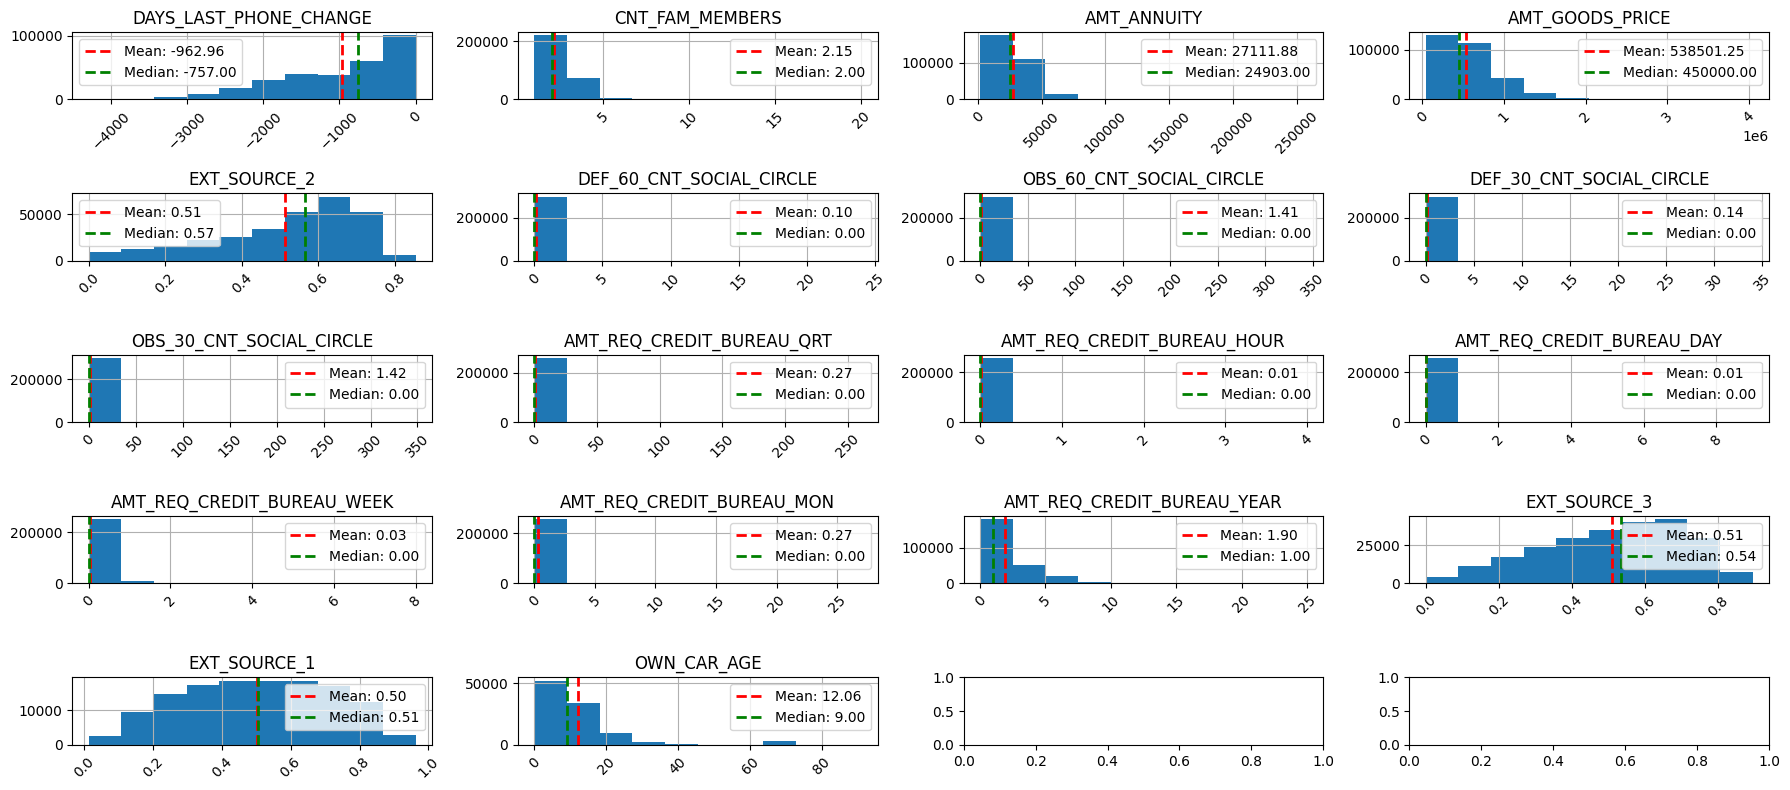

In [ ]:
# hacemos una division del area de las graficas para poder aplicar las funcion: "plot_cols_dist"

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,8))

plot_cols_dist(axes[0], numeric_cols.index[:4], app_data)
plot_cols_dist(axes[1], numeric_cols.index[4:8], app_data)
plot_cols_dist(axes[2], numeric_cols.index[8:12], app_data)
plot_cols_dist(axes[3], numeric_cols.index[12:16], app_data)
plot_cols_dist(axes[4], numeric_cols.index[16:], app_data)

plt.tight_layout()
plt.show()

En general podemos ver que la mayoria de los histogramas tiende a una acumlacion agresiva en solo una par de puntos (pero los los valores unicos que maneja no es de sorprender) y si vemos los NULLS de por **"una grafica de calor"**

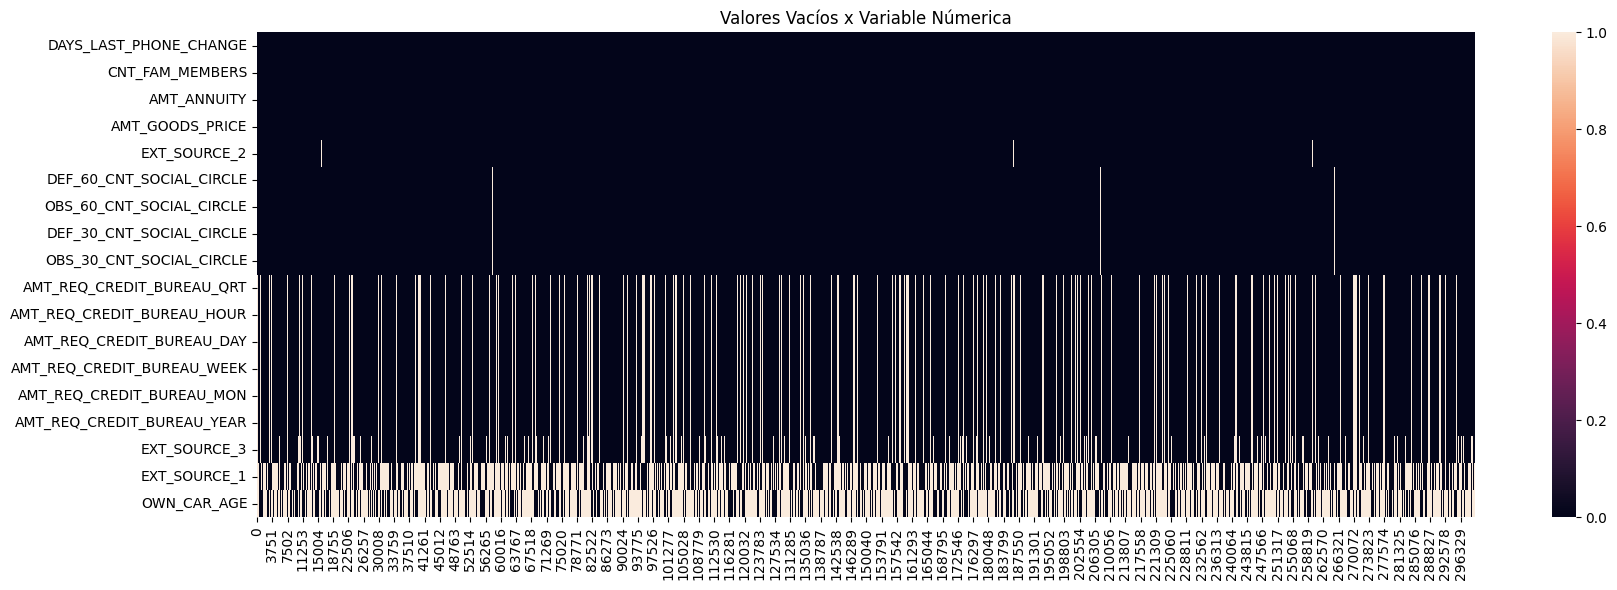

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(app_data[numeric_cols.index].isnull().T, vmin=0, vmax=1)
plt.title("Valores Vacíos x Variable Númerica")
plt.tight_layout()
plt.show()

La grafica de calor nos da un patron de valores NULLS y por ello vamos hacer lo siguiente para reemplazar estos valores por ***medio de los percitiles*** ya que al contar un columnas de valores enteros; la media no es suficiente y con los histogramas es mas factible que sea por medio de esta forma....

*(que apesar de que desconocemos el valor real; hacemos esto para darno una aproximacion para que pueda usar la informacion de los registros en los modelo)*

In [ ]:
# hacemos un funcion que extraiga los percentiles ".25" y "".75"

def rango_intercuantil(serie: pd.Series):
    q_1st = serie.quantile(0.25)
    q_3rd = serie.quantile(0.75)

    if q_1st == q_3rd:
        return [q_1st]
    else:
        return np.arange(q_1st, q_3rd)      # pedimos que nos regrese una array de valores entre los percentiles

In [ ]:
# Llenamos vacíos con valores dentro del rango interpercentiles (y con otra funcion escoja una valor aleatorio del dicho array)
for col in numeric_cols.index:
    rango_q = rango_intercuantil(app_data[col])
    app_data.loc[app_data[col].isna(), col] = app_data.loc[app_data[col].isna(), col].apply(lambda x: random.choice(rango_q))

## **Limpieza Parte 3** (Documentos Sin Descripción)
---
Nos topamos con estas columnas muy ambiguas; como podemos proceder con este tipo de informacion ???


In [ ]:
document_columns = [col for col in app_data.columns if col.startswith("FLAG_DOCUMENT")]   # traemos una lista del nombre de las columnas con alguna determinacion de "flag_documento"

In [ ]:
descripcion.query(f"Row == {document_columns}")   # visualizamos la descripcion de las columnas anteriores

,Unnamed: 0,Table,Row,Description,Special
96,99,application_data,FLAG_DOCUMENT_2,Did client provide document 2,NaN
97,100,application_data,FLAG_DOCUMENT_3,Did client provide document 3,NaN
98,101,application_data,FLAG_DOCUMENT_4,Did client provide document 4,NaN
99,102,application_data,FLAG_DOCUMENT_5,Did client provide document 5,NaN
100,103,application_data,FLAG_DOCUMENT_6,Did client provide document 6,NaN
101,104,application_data,FLAG_DOCUMENT_7,Did client provide document 7,NaN
102,105,application_data,FLAG_DOCUMENT_8,Did client provide document 8,NaN
103,106,application_data,FLAG_DOCUMENT_9,Did client provide document 9,NaN
104,107,application_data,FLAG_DOCUMENT_10,Did client provide document 10,NaN
105,108,application_data,FLAG_DOCUMENT_11,Did client provide document 11,NaN


Apesar de los esfuerzos de localizar alguna tipo informacion que nos podria ayudar a ver con mas claridad la importancia y aportacion que nos bridar que los prestamista tenga marcado la entrega de cierto documento; se tomo la desicion de No considerar los documentos (2-21) porque:

*   El suponer estas columnas no es buena idea.

*   Por lo que no sabemos cual pueda ser relevante para nuestra variable respuesta (aun sabiendo que algunas podrian ser significativa)

*   Podriamos convertirlo en una columna categorica; pero esto causaria una perdida de informacion.

In [ ]:
app_data.drop(document_columns, axis=1, inplace=True)

In [ ]:
app_data.shape

(300000, 55)

Traemos 53 variables - Fin Limpieza Parte 3

## **Limpieza Parte 4** (Variables en Días)
---
A continuación analizaremos las variables que vienen en días; veremos su descripción y distribución.



In [ ]:
day_columns = [col for col in app_data.columns if col.startswith("DAYS")]   # hacemos una lista del nombre de las columnas con inicio "DAYS"

In [ ]:

descripcion.query(f"Row == {day_columns}")      # visualizamos denuevo las descricion de dichas columnas

,Unnamed: 0,Table,Row,Description,Special
17,20,application_data,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
18,21,application_data,DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
19,22,application_data,DAYS_REGISTRATION,How many days before the application did client change his registration,time only relative to the application
20,23,application_data,DAYS_ID_PUBLISH,How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
95,98,application_data,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone,NaN


Estas columnas estan diseñadas para ver los tiempos que ha tenido el prestamista de ciertas condiciones antes de haber pedido el prestamos *(Aunque sean datos registrado para esta evalucion, son suficientes para nuestro proposito)*

Veamos el comportamiento estadistico de esta columnas; estableciendo ciertos percentiles ya deseamos ver como es la acumulacion de los datos por cada $1/5$ de la columna....

In [ ]:
percentiles = np.arange(0, 1, step=0.2)[1:]     # Hacemos un array que tenga los percentile en 20%

print(percentiles)

[0.2 0.4 0.6 0.8]


In [ ]:
app_data.loc[:, day_columns].describe(percentiles = percentiles)    # Aplicamos el "describe()" con el percentil establecido

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,-16035.967173,63755.456187,-4987.101363,-2994.038757,-962.959295
std,4363.959260,141226.399457,3523.313035,1509.421643,826.745955
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
20%,-20471.000000,-3232.000000,-8232.000000,-4430.000000,-1720.000000
40%,-17219.000000,-1694.000000,-5458.000000,-3880.000000,-1060.000000
50%,-15748.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
60%,-14415.000000,-821.000000,-3538.000000,-2654.000000,-547.000000
80%,-11693.000000,-145.000000,-1492.000000,-1378.000000,-161.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


Las variables DAYS deben ser todas negativas *(se toma cuantos días han pasado de hoy a la fecha de contrato)* y vemos que en **"DAYS_EMPLOYED"** no solamente tenemos un outlier sino que ese valor es positivo. Veremos que proporción de nuestra base trae outliers en esa variable......

In [ ]:
def rango_intercuantil(serie: pd.Series):   # establecemos la funcion "rango_intercualtil" usado con anterioridad
    q_1st = serie.quantile(0.25)
    q_3rd = serie.quantile(0.75)

    if q_1st == q_3rd:
        return [q_1st]
    else:
        return np.arange(q_1st, q_3rd)

In [ ]:
# longitud del rango intercuantil de la columna "DAYS_EMPLOYED"
rango_q = rango_intercuantil(app_data["DAYS_EMPLOYED"])
iqr = max(rango_q) - min(rango_q)

In [ ]:
# de esta forma hacemos un identificador de los valores atipicos de la columnas "DAYS_EMPLOYED"

lower = app_data["DAYS_EMPLOYED"][app_data["DAYS_EMPLOYED"] < min(rango_q) - 1.5 * iqr]
higher = app_data["DAYS_EMPLOYED"][app_data["DAYS_EMPLOYED"] > max(rango_q) + 1.5 * iqr]

In [ ]:
data = []     # para no perder esta informacion calculada la almacenamos en una lista llamada "data"
data.append([min(rango_q), max(rango_q), iqr])

In [ ]:
print("Tabla 1")      # aplicamos un "describe()" de los valores atipicos
display(pd.concat([lower.describe(), higher.describe()], axis=1))

Tabla 1


,DAYS_EMPLOYED,DAYS_EMPLOYED
count,16447.000000,53973.0
mean,-8953.590624,365243.0
std,2085.304555,0.0
min,-17912.000000,365243.0
25%,-10214.000000,365243.0
50%,-8335.000000,365243.0
75%,-7289.000000,365243.0
max,-6467.000000,365243.0


viendo que los valores que esta por encima del "higher" no esta tomando un comportamiento natural, es dispensable ver la forma de como cambiar este ritmo....

In [ ]:
# vemos el % de los valores apiticos que maneja la columna "DAYS_EMPLOYED"
outliers = lower.shape[0] + higher.shape[0]
N = app_data.shape[0]
print(outliers, "=", round(outliers/N*100, 2), "% de los registros de DAYS_EMPLOYED están fueran del rango intercuantil")

70420 = 23.47 % de los registros de DAYS_EMPLOYED están fueran del rango intercuantil


In [ ]:
# Reemplazamos el valor 365243 por uno que se encuentra en el rango intercuantil
app_data.loc[app_data["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = app_data.loc[app_data["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"].apply(lambda x: random.choice(rango_q))

In [ ]:
rango_q = rango_intercuantil(app_data["DAYS_EMPLOYED"])
iqr = max(rango_q) - min(rango_q)

In [ ]:
lower = app_data["DAYS_EMPLOYED"][app_data["DAYS_EMPLOYED"] < min(rango_q) - 1.5 * iqr]
higher = app_data["DAYS_EMPLOYED"][app_data["DAYS_EMPLOYED"] > max(rango_q) + 1.5 * iqr]

In [ ]:
data.append([min(rango_q), max(rango_q), iqr])

In [ ]:
print("Tabla 2")
display(pd.DataFrame(data=data, columns=("25%", "75%", "IQR")))

Tabla 2


,25%,75%,IQR
0,-2761.0,-291.0,2470.0
1,-2761.0,-798.0,1963.0


In [ ]:
outliers = lower.shape[0] + higher.shape[0]
print(outliers, "=", round(outliers/N*100, 2), "% de la información")

20996 = 7.0 % de la información


En ***la tabla 1*** vemos que el valor de 365243 acumulaba el total de outliers mayores al 3er cuantil. Al sustituir ese valor por uno que se encontraba en el rango intercuantil vemos que pasamos de un 23.47% de outliers a un 7.01% en los registros de **"DAYS_EMPLOYED"**. Esto lo hicimos para no eliminar información y por su parte corregir ese valor.

Por otra parte, por la magnitud de los dias que se maneja estas columnas; decidido trabajar la información en años ya que queremos que un representacion de estos datos "mas ligera" para los modelos predictivos...

Haremos las transformaciones de estas variables a años y lo mismo para la variable **"AMT_REQ_CREDIT_BUREAU"**; nos quedaremos con la que viene en años.

In [ ]:
# con este "for" hacemos los cambios en "años" de los datos

for col in day_columns:
    app_data[col.replace("DAYS", "YEARS")] = (abs(app_data[col])/365.25).astype(int)

In [ ]:
years_columns = [col.replace("DAYS", "YEARS") for col in day_columns]     # guardamos el nombre de las columnas en esta lista

Veamos su comportamiento con*** una gráfica de boxplot*** entre la respuesta 0 y 1.

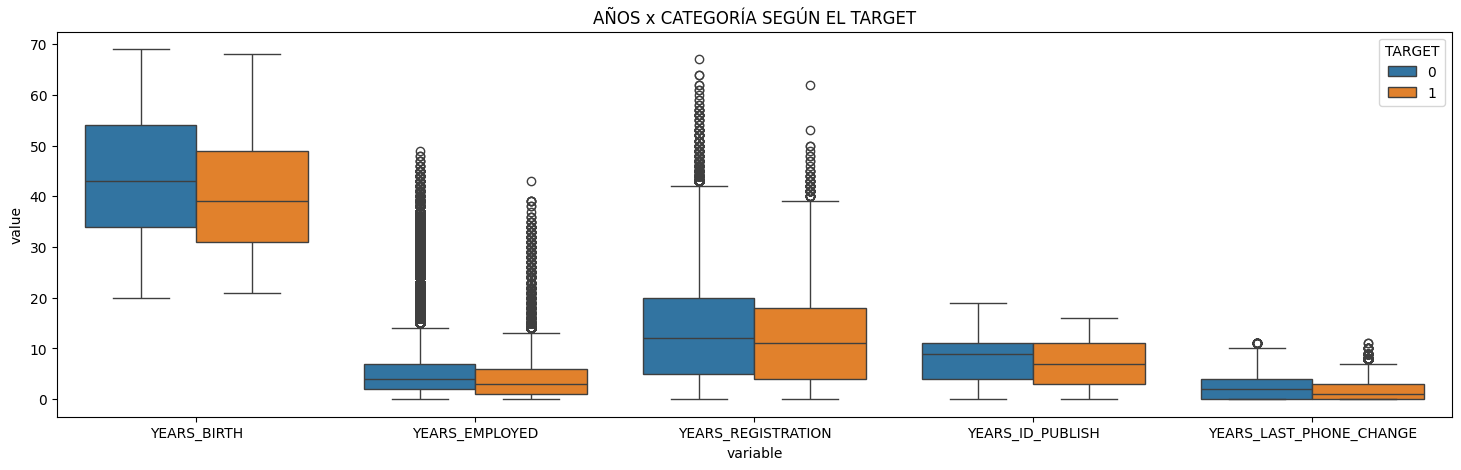

In [ ]:
aux = app_data.loc[:, years_columns+["TARGET"]].melt(id_vars="TARGET")
plt.figure(figsize=(18, 5))
sns.boxplot(data=aux, x="variable", y="value",  hue="TARGET")
plt.title("AÑOS x CATEGORÍA SEGÚN EL TARGET")
plt.show()

La gráfica no cambia mucho con respecto a la primera; la información viene más concentrada y unificamos la unidad con la que trabajamos (AÑOS) para estas y otras variables que tengamos con una unidad distinta.
Pero, hagamos un analisis de lo que estamos observando:
Tenemos una mediana de aproximadamente el 20%.  Esto significa que el 50% de los clientes con una determinada antigüedad en la empresa tienen un porcentaje de dificultades de pago inferior al 20%(que se encuentra dentro del rango comprendido entre el 10% y el 30%), mientras que el otro 50% tienen un porcentaje superior al 20%.
En este caso, podemos ver que el porcentaje de clientes con dificultades de pago aumenta a medida que aumenta la antigüedad en la empresa. Esto significa que los clientes con mayor antigüedad son más propensos a tener dificultades de pago.

In [ ]:
print("Tabla 3")
app_data.loc[app_data["TARGET"] == 1, years_columns].describe()

Tabla 3


,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
count,24236.000000,24236.000000,24236.000000,24236.000000,24236.000000
mean,40.260150,4.383149,11.798275,6.994719,1.813789
std,11.482473,4.815259,9.023767,4.150646,2.001986
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,4.000000,3.000000,0.000000
50%,39.000000,3.000000,11.000000,7.000000,1.000000
75%,49.000000,6.000000,18.000000,11.000000,3.000000
max,68.000000,43.000000,62.000000,16.000000,11.000000


Con la gráfico vemos que el cuadro de las personas con retraso en sus pagos es más chico en proporción que las personas que no han tenido retraso y en la tabla 3 podemos ver que el rango de las personas con retrasos se encuentra entre 31-49 años.

In [ ]:
amt_req_cols = [col for col in app_data.columns if col.startswith("AMT_REQ") and col != "AMT_REQ_CREDIT_BUREAU_YEAR"]

In [ ]:
app_data.drop(amt_req_cols, axis=1, inplace=True)

In [ ]:
app_data.drop(day_columns, axis=1, inplace=True)

In [ ]:
app_data.shape

(300000, 50)

Traemos 48 columnas - Fin Limpieza Parte 4

## **Limpieza Parte 5** (Variables Categóricas)
 Este apartado tiene el objetivo de ver la forma de reducir "las respuestas ordinarias" de las V.A.s categoricas y sacar mas detalles de la informacion que se extrajo...

In [ ]:
def plot_category(data: pd.DataFrame, col: str):
    plt.figure(figsize=(22,4))
    data[col].hist()
    plt.xticks(rotation=45)
    plt.show()

### Días de la Semana

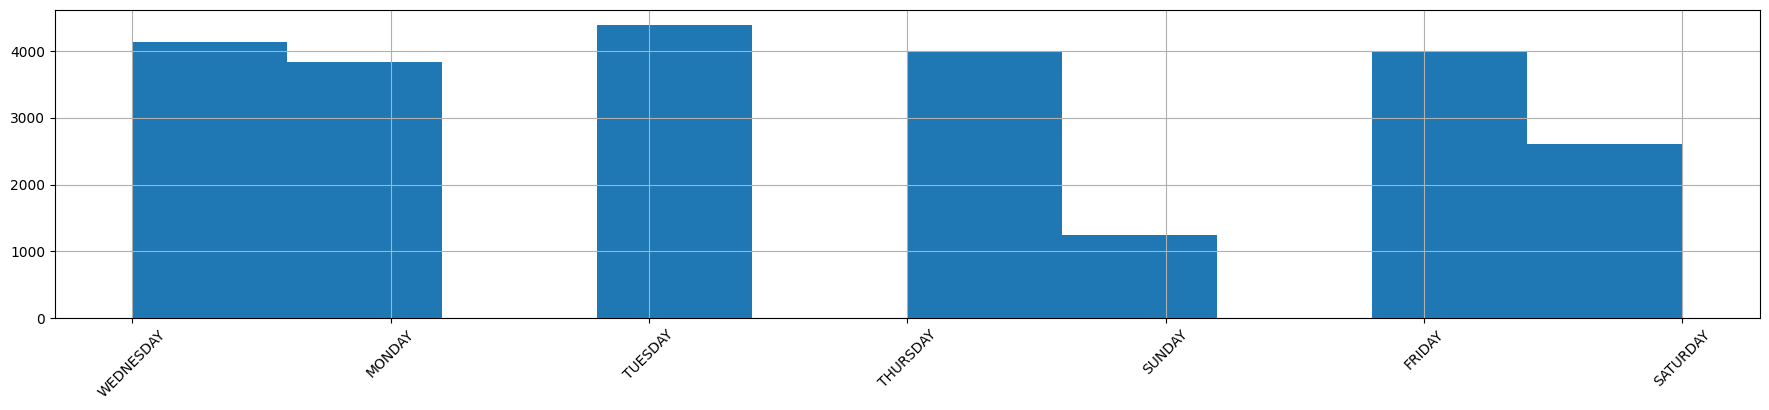

In [ ]:
plot_category(app_data.query("TARGET == 1"), "WEEKDAY_APPR_PROCESS_START")

Lo siguiente muestra en qué día de la semana el cliente solicitó el préstamo. El día con mayor número de clientes es el martes, seguido del miercoles y el jueves. Los días con menor número de visitantes son el sábado y el domingo.



In [ ]:
app_data["WEEKEND"] = app_data["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: 1 if x in ("SATURDAY", "SUNDAY") else 0)

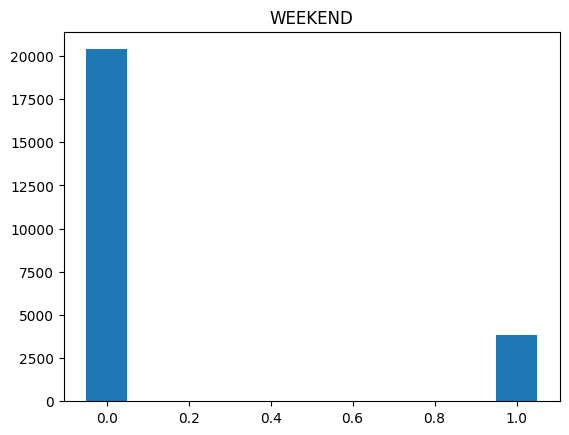

In [ ]:
plt.bar(x=[0, 1], height=app_data.query("TARGET == 1")["WEEKEND"].value_counts(), width=0.1)
plt.title("WEEKEND")
plt.show()

In [ ]:
app_data.drop("WEEKDAY_APPR_PROCESS_START", axis=1, inplace=True)

### Género

In [ ]:
app_data["CODE_GENDER"].value_counts(normalize=True)

CODE_GENDER
F      0.658423
M      0.341563
XNA    0.000013
Name: proportion, dtype: float64

In [ ]:
app_data.drop(app_data[app_data["CODE_GENDER"] == "XNA"].index, inplace=True)

In [ ]:
app_data["FEMALE"] = app_data["CODE_GENDER"].apply(lambda x: 1 if x == "F" else 0)

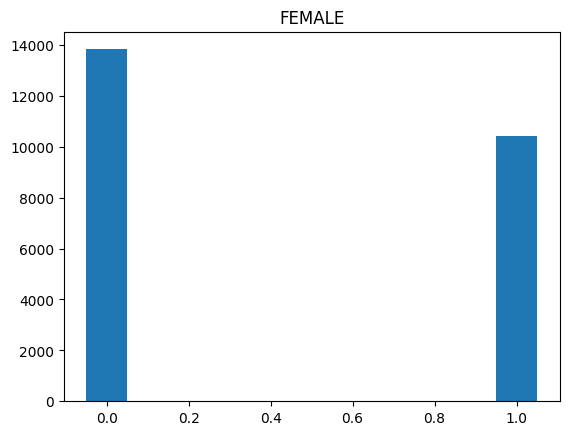

In [ ]:
plt.bar(x=[0, 1], height=app_data.query("TARGET == 1")["FEMALE"].value_counts(), width=0.1)
plt.title("FEMALE")
plt.show()

In [ ]:
app_data.drop("CODE_GENDER", axis=1, inplace=True)

In [ ]:
app_data["FLAG_OWN_CAR"] = app_data["FLAG_OWN_CAR"].apply(lambda x: 1 if x == "Y" else 0)
app_data["FLAG_OWN_REALTY"] = app_data["FLAG_OWN_REALTY"].apply(lambda x: 1 if x == "Y" else 0)

Cambiamos a 1 y 0 estas flags que nos indican "Y" (1) si el cliente posee coche o apartamento, respectivamente y "N" (0) cuando no.

### Variables con vacíos

In [ ]:
empty = [col for col in app_data.select_dtypes(include="object").columns if app_data[col].isna().tolist().count(True) > 0]
print(empty)

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']


In [ ]:
a0 = app_data.loc[app_data["TARGET"] == 0, "NAME_TYPE_SUITE"].value_counts(normalize=True)
a1 = app_data.loc[app_data["TARGET"] == 1, "NAME_TYPE_SUITE"].value_counts(normalize=True)
at = app_data.loc[:, "NAME_TYPE_SUITE"].value_counts(normalize=True, dropna=True)
aux = pd.concat([a0, a1, at], axis=1)
aux.columns = (0, 1, "total")
display(aux)

,0,1,total
NAME_TYPE_SUITE,,,
Unaccompanied,0.810595,0.821996,0.811517
Family,0.131993,0.121442,0.131139
"Spouse, partner",0.037272,0.035915,0.037162
Children,0.010751,0.009806,0.010675
Other_B,0.005685,0.007034,0.005794
Other_A,0.002833,0.002855,0.002835
Group of people,0.000870,0.000952,0.000877


Observemos que la mayoría de las personas(81%) no iban acompañados, mientras que el resto, iba acompañado de familia(13%), pareja (3.7%) e hijos(1.06%)  

In [ ]:
print("{:.2f} % con registros vacíos".format(app_data["NAME_TYPE_SUITE"].isna().tolist().count(True)/app_data.shape[0]*100))

0.42 % con registros vacíos


Aplicaremos el Principo de Pareto sobre las variables categóricas para reducir los registros a aquellos que representen el porcentaje indicado en la siguiente función.

In [ ]:
def principio_pareto(serie: pd.Series, tol: float):
    aux = serie.value_counts(normalize=True)
    x = 0
    l = []
    vars = []
    for var, y in zip(aux.index, aux):
      x += y
      l.append(x)
      if x <= tol:
        vars.append(var)

    res = pd.Series(vars, name=serie.name)
    display(res)
    return res

def sustituir(serie: pd.Series, vars: pd.Series):
    return serie.apply(lambda x: x if x in vars.tolist() else "Other")

In [ ]:
vars_type_suite = principio_pareto(app_data["NAME_TYPE_SUITE"], 0.95)

0    Unaccompanied
1           Family
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
app_data["NAME_TYPE_SUITE"] = sustituir(app_data["NAME_TYPE_SUITE"], vars_type_suite)

Hemos llenado los vacíos de NAME_TYPE_SUITE con Unaccompanied que es el valor que predomina en los 3 casos, cuando Target es 0 o 1 y el Total.

In [ ]:
b0 = app_data.loc[app_data["TARGET"] == 0, "OCCUPATION_TYPE"].value_counts(normalize=True)
b1 = app_data.loc[app_data["TARGET"] == 1, "OCCUPATION_TYPE"].value_counts(normalize=True)
bt = app_data.loc[:, "OCCUPATION_TYPE"].value_counts(normalize=True, dropna=True)
aux = pd.concat([b0, b1, bt], axis=1)
aux.columns = (0, 1, "total")
display(aux)

,0,1,total
OCCUPATION_TYPE,,,
Laborers,0.256354,0.314598,0.261474
Sales staff,0.150673,0.167127,0.152119
Core staff,0.134214,0.093419,0.130628
Managers,0.104090,0.071389,0.101215
Drivers,0.085449,0.113682,0.087931
High skill tech staff,0.055538,0.037875,0.053986
Accountants,0.048477,0.025839,0.046487
Medicine staff,0.041309,0.031029,0.040406
Security staff,0.031177,0.038428,0.031815


En este apartado, podemos observar el oficio que tienen nuestros clientes, donde el 26% es trabajador, 15% personal de ventas, 13% personal central, el 10% son managers, 8% conductores y de está cifra mara abajo va reduciendo considerablemente.

In [ ]:
print("{:.2f} % con registros vacíos".format(app_data["OCCUPATION_TYPE"].isna().tolist().count(True)/app_data.shape[0]*100))

31.32 % con registros vacíos


Como traemos 31.32 % de la información con registros vacíos y distribuidos procederemos con llenar los valores vacíos de forma aleatoria entre las variables que explican el 80%.

In [ ]:
vars_occupation_type = principio_pareto(app_data["OCCUPATION_TYPE"], 0.8)

0                 Laborers
1              Sales staff
2               Core staff
3                 Managers
4                  Drivers
5    High skill tech staff
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
app_data.loc[app_data["OCCUPATION_TYPE"].isna(), "OCCUPATION_TYPE"] = app_data.loc[app_data["OCCUPATION_TYPE"].isna(), "OCCUPATION_TYPE"].apply(lambda x: random.choice(vars_occupation_type))

In [ ]:
vars_occupation_type = principio_pareto(app_data["OCCUPATION_TYPE"], 0.80)

0       Laborers
1    Sales staff
2     Core staff
3       Managers
4        Drivers
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
app_data["OCCUPATION_TYPE"] = sustituir(app_data["OCCUPATION_TYPE"], vars_occupation_type)

Al realizarlo de forma aleatoria la proporción inicial se mantiene similar.

In [ ]:
b0 = app_data.loc[app_data["TARGET"] == 0, "OCCUPATION_TYPE"].value_counts(normalize=True)
b1 = app_data.loc[app_data["TARGET"] == 1, "OCCUPATION_TYPE"].value_counts(normalize=True)
bt = app_data.loc[:, "OCCUPATION_TYPE"].value_counts(normalize=True, dropna=True)
aux = pd.concat([b0, b1, bt], axis=1)
aux.columns = (0, 1, "total")
display(aux)

,0,1,total
OCCUPATION_TYPE,,,
Other,0.236144,0.221654,0.234973
Laborers,0.228198,0.277273,0.232163
Sales staff,0.155352,0.167932,0.156369
Core staff,0.144981,0.108351,0.142022
Managers,0.124485,0.096509,0.122225
Drivers,0.110839,0.128280,0.112248


Después de haber realizado una limpieza, actualicemos nuestros valores y vemos a comparación de otro que tenemos de trabajadores el 23%, personal de ventas el 15%, personal central  el 14%, managers el 12% y conductores el 11%

### Variables Categóricas

In [ ]:
# Valores únicos por variable categórica
cat = pd.Series({col: (app_data[col].dtype, len(app_data[col].unique())) for col in app_data.select_dtypes(include="object").columns})
print(cat)

NAME_CONTRACT_TYPE      (object, 2)
NAME_TYPE_SUITE         (object, 3)
NAME_INCOME_TYPE        (object, 8)
NAME_EDUCATION_TYPE     (object, 5)
NAME_FAMILY_STATUS      (object, 6)
NAME_HOUSING_TYPE       (object, 6)
OCCUPATION_TYPE         (object, 6)
ORGANIZATION_TYPE      (object, 58)
dtype: object


Aplicaremos el principio de Pareto sobre Organization_Type igual para reducir las variables. Pero antes veamos la proporción de las variables con un histograma.

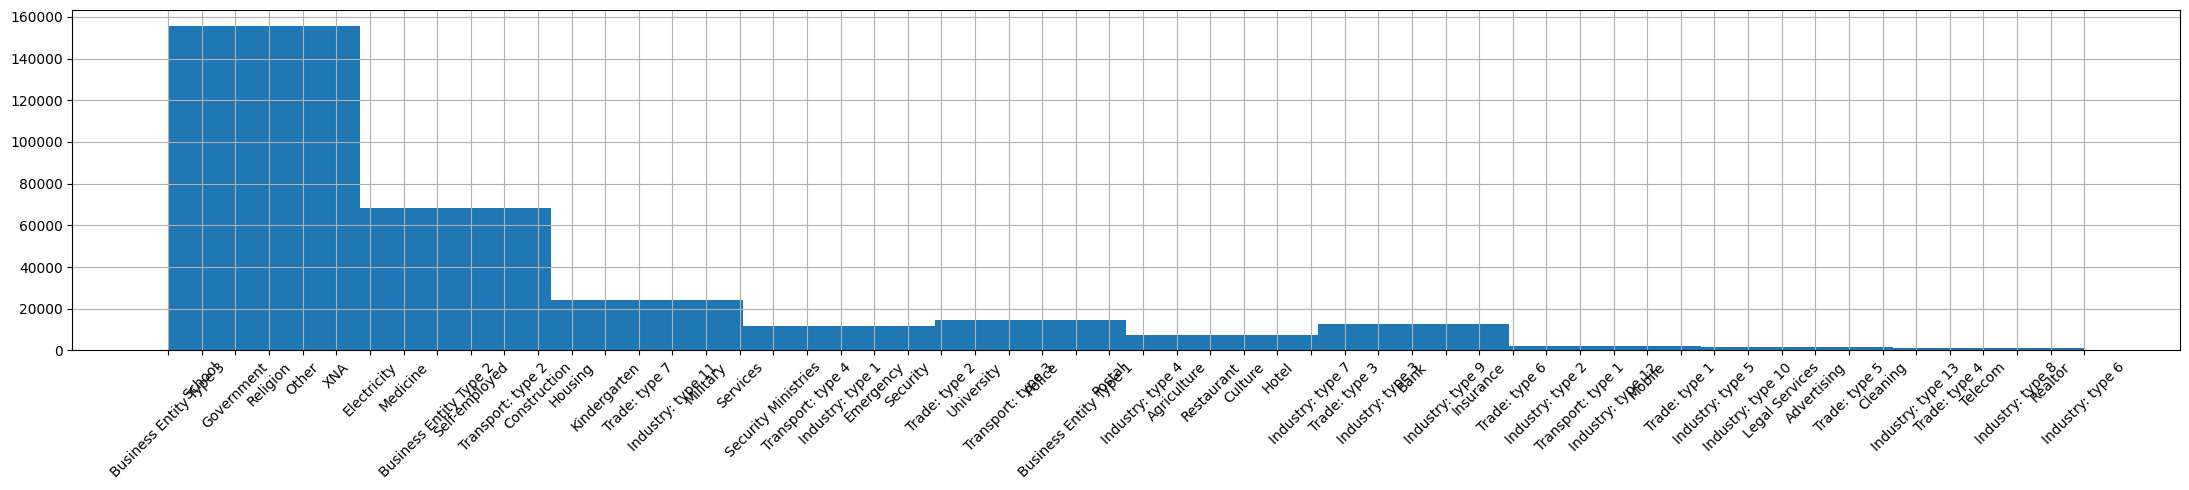

In [ ]:
plt.figure(figsize=(22,5))
app_data["ORGANIZATION_TYPE"].hist()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el gráfico vemos que hay algunos valores que se llaman igual y solamente cambia el tipo. Haremos un diccionario para agrupar la información.

In [ ]:
def occupation(x: str):
    if "Business" in x:
        return "Business"
    elif "Industry" in x:
        return "Industry"
    elif "Transport" in x:
        return "Transport"
    elif "Trade" in x:
        return "Trade"
    else:
        return x

In [ ]:
app_data["ORGANIZATION_TYPE"] = list(map(occupation, app_data["ORGANIZATION_TYPE"]))

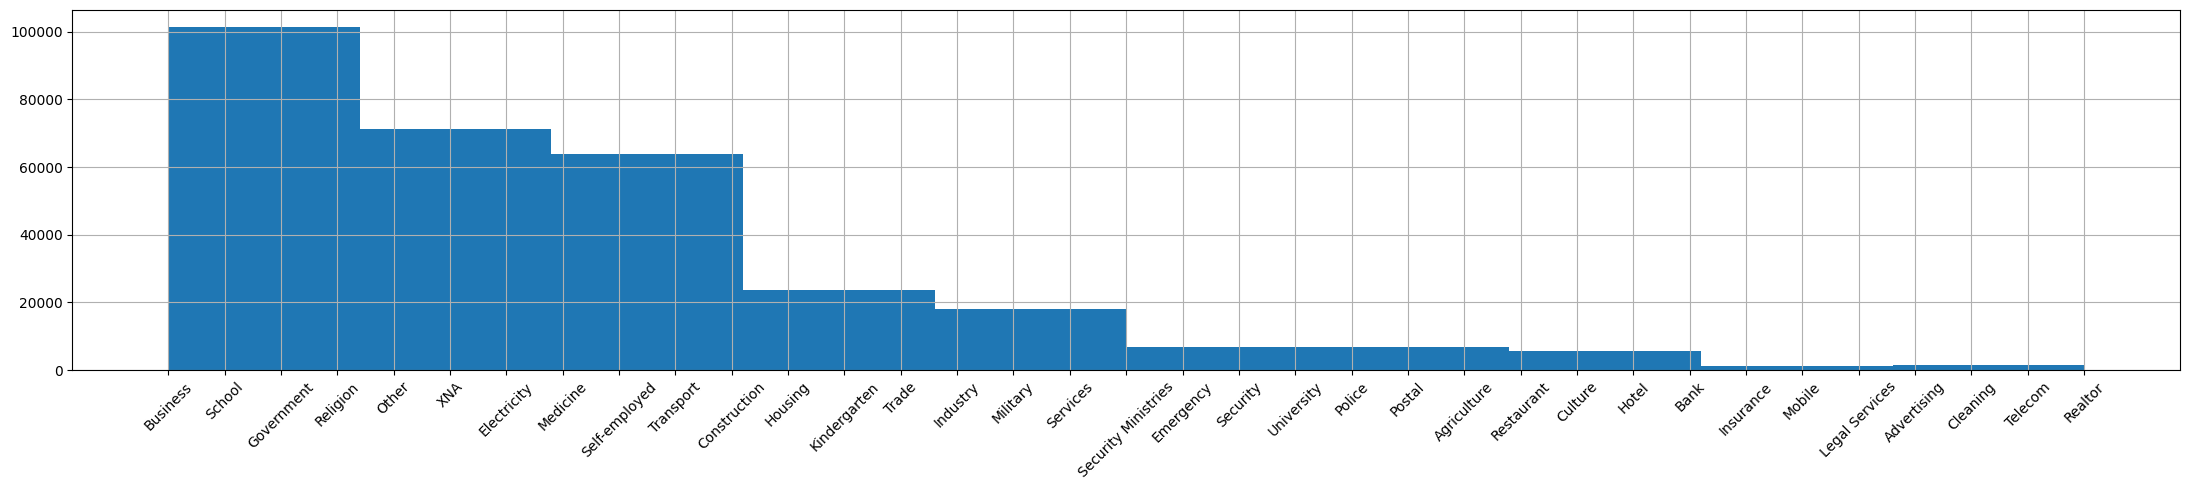

In [ ]:
plt.figure(figsize=(22,5))
app_data["ORGANIZATION_TYPE"].hist()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
c0 = app_data.loc[app_data["TARGET"] == 0, "ORGANIZATION_TYPE"].value_counts(normalize=True)
c1 = app_data.loc[app_data["TARGET"] == 1, "ORGANIZATION_TYPE"].value_counts(normalize=True)
ct = app_data.loc[:, "ORGANIZATION_TYPE"].value_counts(normalize=True, dropna=True)
aux = pd.concat([c0, c1, ct], axis=1)
aux.columns = (0, 1, "total")
display(aux.sort_values(by="total", ascending=False).head(10))

,0,1,total
ORGANIZATION_TYPE,,,
Business,0.271780,0.310489,0.274907
XNA,0.185147,0.120358,0.179912
Self-employed,0.122066,0.157287,0.124912
Other,0.054547,0.051411,0.054294
Trade,0.046004,0.052319,0.046514
Industry,0.046171,0.049554,0.046444
Medicine,0.037054,0.029749,0.036464
Government,0.034193,0.029419,0.033807
Transport,0.028732,0.035031,0.029240


Lo mismo que en las anteriores, se concentra la información en algunos de los valores. Como traemos demasiadas variables aplicaremos un (85-15).
También, podemos observar que tipo de trabajador es nuestro cliente, colocandose en primer lugar las personas de negocios y en último lugar lo que son trabajadores de transportes y de escuelas.

In [ ]:
vars_organization_type = principio_pareto(app_data["ORGANIZATION_TYPE"], 0.85)

0         Business
1              XNA
2    Self-employed
3            Other
4            Trade
5         Industry
6         Medicine
7       Government
8        Transport
Name: ORGANIZATION_TYPE, dtype: object

In [ ]:
app_data["ORGANIZATION_TYPE"] = sustituir(app_data["ORGANIZATION_TYPE"], vars_organization_type)

Veamos el resultado

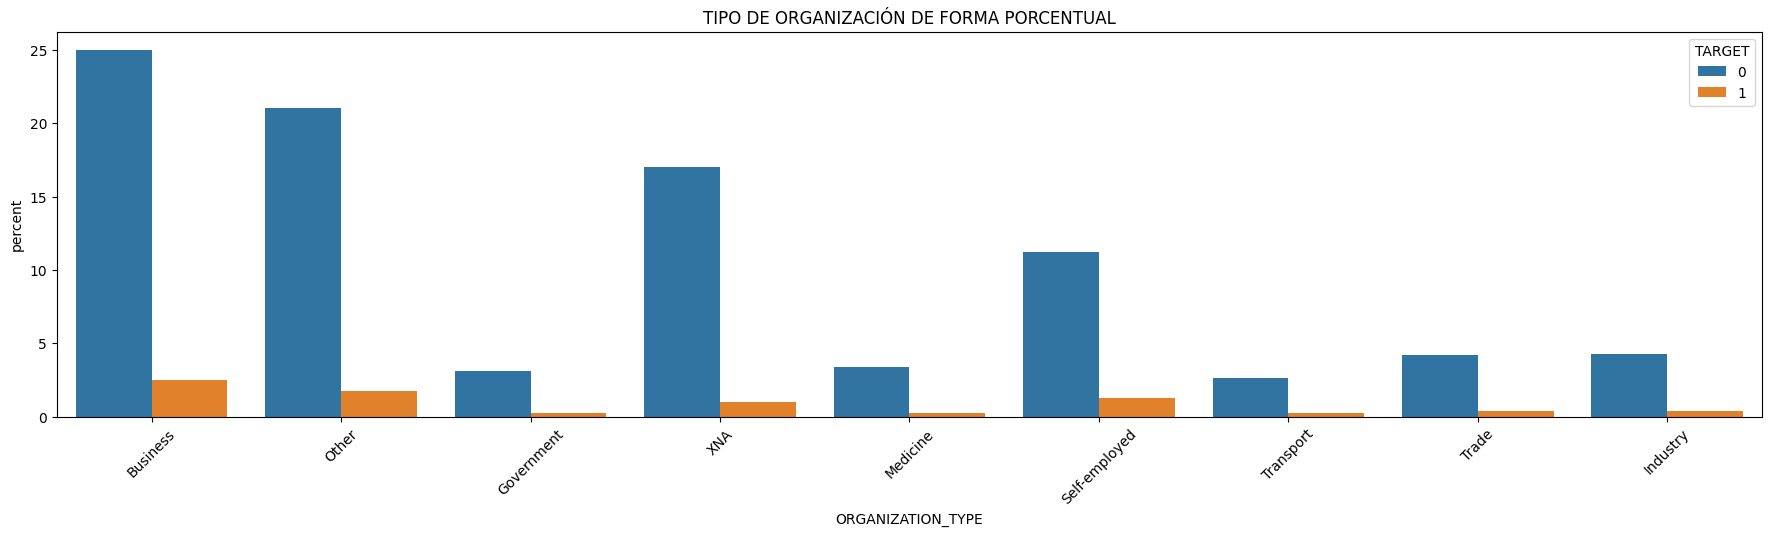

In [ ]:
plt.figure(figsize=(22,5))
sns.countplot(data=app_data, x="ORGANIZATION_TYPE", hue="TARGET", stat="percent")
plt.xticks(rotation=45)
plt.title("TIPO DE ORGANIZACIÓN DE FORMA PORCENTUAL")
plt.show()

In [ ]:
# Valores únicos por variable categórica
cat = pd.Series({col: (app_data[col].dtype, len(app_data[col].unique())) for col in app_data.select_dtypes(include="object").columns})
print(cat)

NAME_CONTRACT_TYPE     (object, 2)
NAME_TYPE_SUITE        (object, 3)
NAME_INCOME_TYPE       (object, 8)
NAME_EDUCATION_TYPE    (object, 5)
NAME_FAMILY_STATUS     (object, 6)
NAME_HOUSING_TYPE      (object, 6)
OCCUPATION_TYPE        (object, 6)
ORGANIZATION_TYPE      (object, 9)
dtype: object


In [ ]:
# Última comprobación de valores vacíos
vacios_final = [col for col in app_data.columns if app_data[col].isna().tolist().count(True) > 0]
print(vacios_final)

[]


Finalmente, nuestras variables se encuentran sin vacíos y las categóricas se encuentran mejor agrupadas.

In [ ]:
app_data.shape

(299996, 50)

Traemos 48 variables - Final Limpieza Parte 5

## **Limpieza Parte 6** (Infinitos)

La V.A. **"SK_ID_CURR"** trata de una elemento de identificacion para cada uno de los registros ha analisis y por ello veamos como es....

In [ ]:
# Comprobación de valores infitos
infinitos = [col for col in app_data.select_dtypes(include="float64").columns if np.isinf(app_data[col]).tolist().count(True) > 0]
print(infinitos)

[]


No traemos valores infinitos

In [ ]:
if app_data["SK_ID_CURR"].unique().__len__() == app_data.shape[0]:
    print("Los ID son únicos.")

Los ID son únicos.


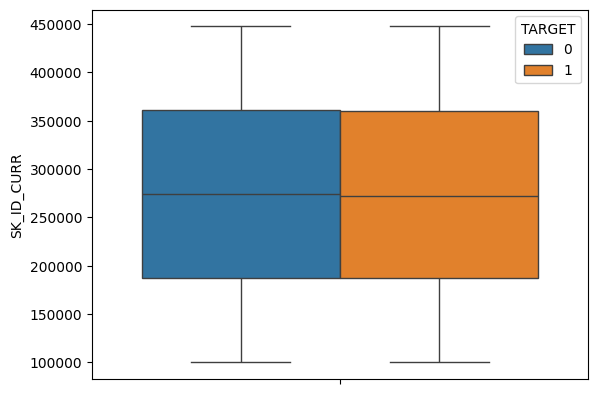

In [ ]:
sns.boxplot(data=app_data, y="SK_ID_CURR", hue="TARGET")
plt.show()

Al traer IDs únicos y confirmando con el gráfico boxplot vemos que no hay diferencia entre la respuesta 0 y 1. Por lo que la eliminaremos ya que no nos va a resultar significativa más adelante.

In [ ]:
app_data.drop("SK_ID_CURR", axis=1, inplace=True)

## **Limpieza Parte 7** (One-Hot Encoding)

Recordemos que el metodo de **One-Hot Enconding** es una forma de convertir V.A.s categoricas de respuesta ordinaria a verlo de multiples otras V.A.s categoricas pero con repuesta binaria...

[Categorías y la codificación One-Hot](https://blog.josemarianoalvarez.com/2018/03/15/categorias-y-la-codificacion-one-hot/)

In [ ]:
object_cols = app_data.select_dtypes(include="object").columns.tolist()

l = []
for col in object_cols:
    l.append(pd.Series(app_data[col].unique(), name=col))

display(pd.concat(l, axis=1).fillna(""))

,NAME_CONTRACT_TYPE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business
1,Revolving loans,Family,State servant,Higher education,Married,Rented apartment,Core staff,Other
2,,Other,Commercial associate,Incomplete higher,Civil marriage,With parents,Other,Government
3,,,Pensioner,Lower secondary,Widow,Municipal apartment,Managers,XNA
4,,,Unemployed,Academic degree,Separated,Office apartment,Drivers,Medicine
5,,,Student,,Unknown,Co-op apartment,Sales staff,Self-employed
6,,,Businessman,,,,,Transport
7,,,Maternity leave,,,,,Trade
8,,,,,,,,Industry


In [ ]:
app_data["Cash loans"] = app_data['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if "Cash loans" in x else 0)

In [ ]:
app_data.drop("NAME_CONTRACT_TYPE", axis=1, inplace=True)

In [ ]:
object_cols.remove("NAME_CONTRACT_TYPE")

In [ ]:
def add_dummies(col: str, data: pd.DataFrame):
    aux = app_data.query("TARGET == 1")[col].value_counts(normalize=True).index[-1] # valor con menos registros en la variable respuesta
    dummies = pd.get_dummies(app_data[col], dtype=int, prefix=col).drop(f"{col}_{aux}", axis=1)
    merged = pd.merge(app_data.drop(col, axis=1), dummies, left_index=True, right_index=True)
    return merged

In [ ]:
for col in object_cols:
    app_data = add_dummies(col=col, data=app_data)

In [ ]:
# Verificamos que ya no traigamos variables categóricas
object_cols = app_data.select_dtypes(include="object").columns.tolist()
print(object_cols)

[]


In [ ]:
app_data.shape

(299996, 78)

Traemos 78 variables - Final Limpieza Parte 7

Observemos como se ve la data

In [ ]:
app_data.head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,WEEKEND,FEMALE,Cash loans,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,ORGANIZATION_TYPE_Business,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA
0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,10.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1.0,25,1,9,5,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,7.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.370650,1.0,0.0,1.0,0.0,0.0,45,3,3,0,2,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.334098,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,52,0,11,6,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,8.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.334098,0.650442,0.370650,2.0,0.0,2.0,0.0,2.0,52,8,26,6,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,9.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.334098,0.322738,0.370650,0.0,0.0,0.0,0.0,0.0,54,8,11,9,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


A continuación, analizaremos las variables que empiezan con OBS y DEF, así como las que son EXT_SOURCE

In [ ]:
columns = [col for col in app_data.columns if col.startswith('OBS') or col.startswith('DEF') or col.startswith('EsXT_SOURCE')]
display(descripcion.query(f"Row == {columns}"))
print("\n")
display(app_data.query("TARGET == 1")[columns].describe(percentiles=percentiles))

,Unnamed: 0,Table,Row,Description,Special
91,94,application_data,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 30 DPD (days past due) default,NaN
92,95,application_data,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 30 DPD (days past due),NaN
93,96,application_data,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 60 DPD (days past due) default,NaN
94,97,application_data,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 60 (days past due) DPD,NaN


,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,24236.000000,24236.000000,24236.000000,24236.000000
mean,1.497854,0.191533,1.479246,0.138224
std,2.382514,0.515928,2.359539,0.427879
min,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000
40%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
60%,1.000000,0.000000,1.000000,0.000000
80%,3.000000,0.000000,3.000000,0.000000
max,30.000000,6.000000,29.000000,5.000000


Eliminaremos la de 60 días porque es la misma variable, sólo que en distinta unidad. El describe sólo considera la variable respuesta 1.

In [ ]:
app_data.drop(["OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"], axis=1, inplace=True)

## Limpieza Parte 8 (Edades)

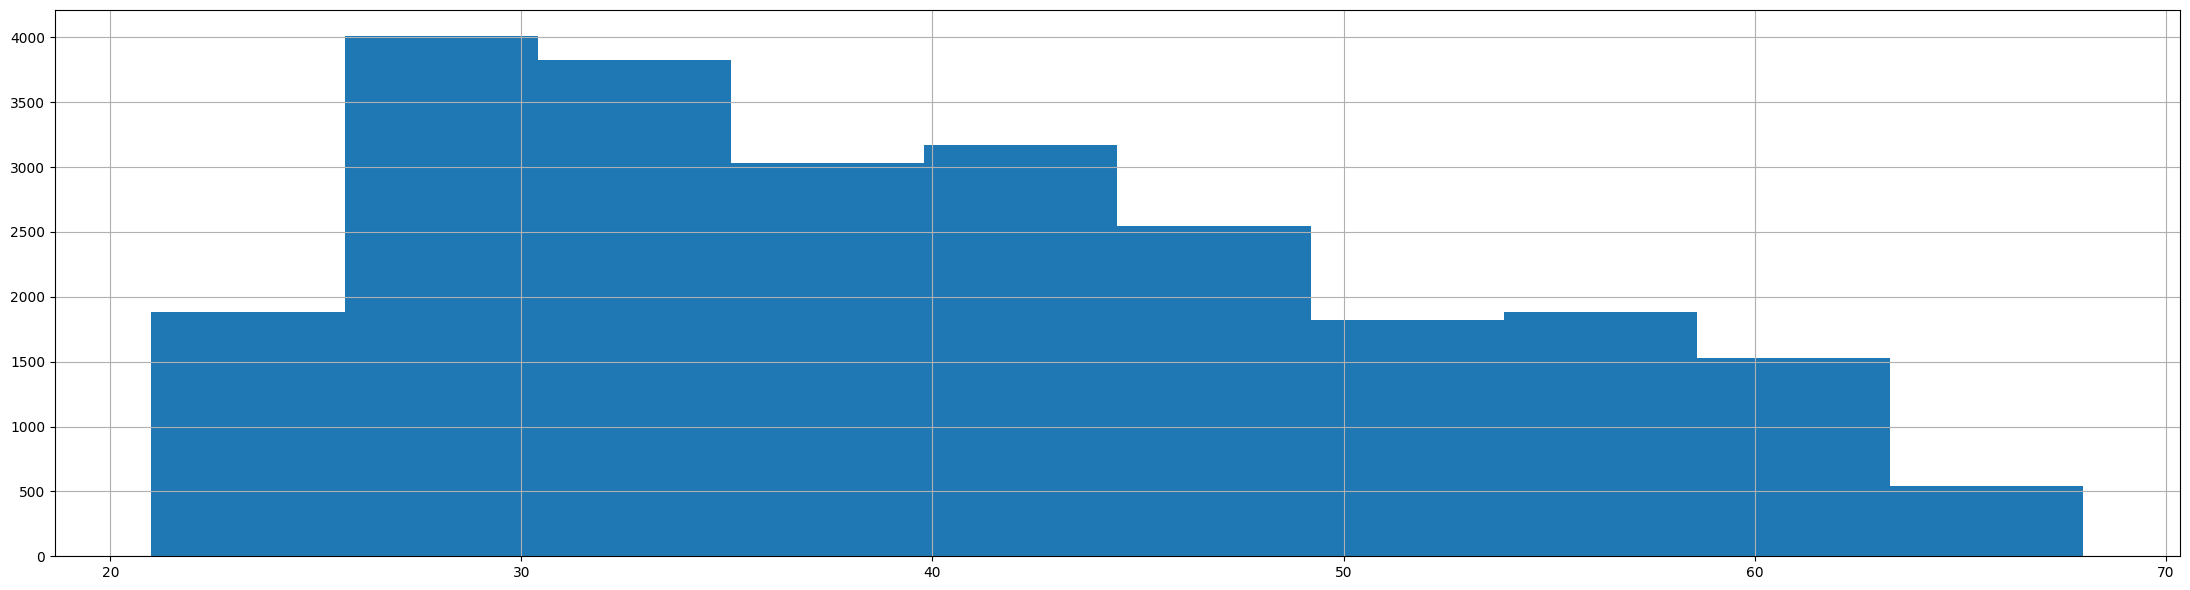

In [ ]:
plt.figure(figsize=(22,6))
app_data.query("TARGET == 1")["YEARS_BIRTH"].hist(bins=10)
plt.tight_layout()
plt.show()

In [ ]:
aux1 = pd.qcut(app_data["YEARS_BIRTH"], q=np.arange(0, 1.1, step=0.1))
aux1.name = "AGE_FACTORS"

aux2 = pd.qcut(app_data["YEARS_BIRTH"], q=np.arange(0, 1.1, step=0.2))
aux2.name = "AGE_FACTORS"

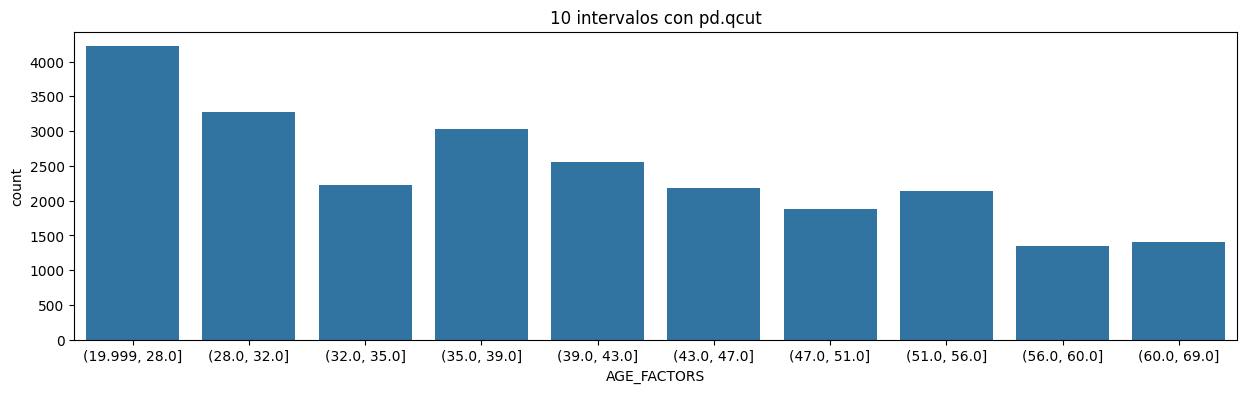

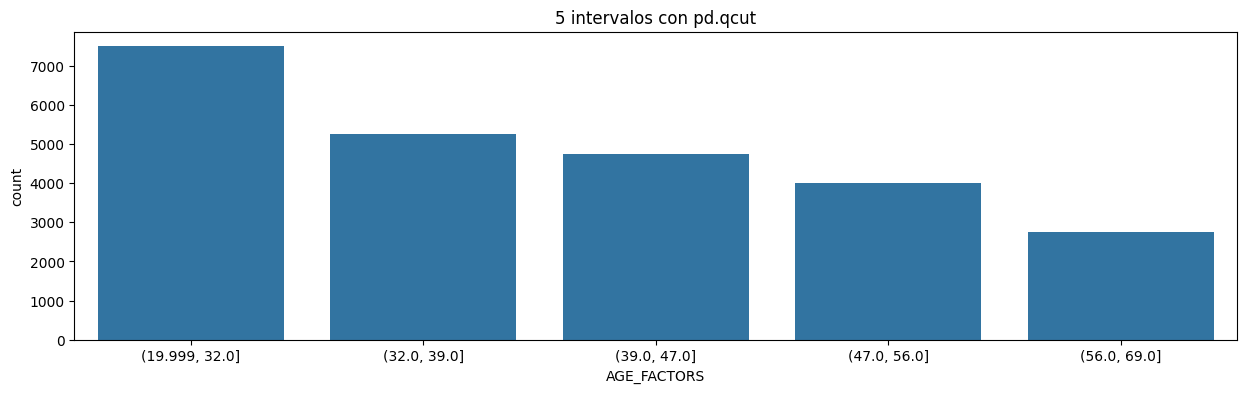

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(x=pd.concat([app_data, aux1], axis=1).query("TARGET == 1")["AGE_FACTORS"], ax=ax)
plt.title("10 intervalos con pd.qcut")
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(x=pd.concat([app_data, aux2], axis=1).query("TARGET == 1")["AGE_FACTORS"], ax=ax)
plt.title("5 intervalos con pd.qcut")
plt.show()

Con la gráfica de arriba vemos las observaciones que tenemos en la variable respuesta por cada intervalo. La 5 agrupa bien la información pero se encuentra más sesgada, por ejemplo en el primer gráfico vemos que el intervalo de (32, 35] trae pocos registros y en el segundo gráfico los está agrupando con el de (35, 39]. Así que decidiremos trabajar con la información separada por 10 intervalos para evitar ese sesgo de clasificación.

In [ ]:
auxz = app_data[years_columns].describe(percentiles=np.arange(0, 1.1, step=0.1)).loc["0%":"100%"]

l = []
for col in years_columns:
    rango_q = rango_intercuantil(app_data[col])
    l.append(max(rango_q)-min(rango_q))

auxz.loc["IQR"] = l
auxz

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0%,20.0,0.0,0.0,0.0,0.0
10%,28.0,1.0,1.0,1.0,0.0
20%,32.0,1.0,4.0,3.0,0.0
30%,35.0,2.0,6.0,5.0,0.0
40%,39.0,3.0,9.0,7.0,1.0
50%,43.0,4.0,12.0,8.0,2.0
60%,47.0,5.0,14.0,10.0,2.0
70%,51.0,6.0,18.0,11.0,3.0
80%,56.0,8.0,22.0,12.0,4.0
90%,60.0,13.0,27.0,12.0,5.0


Viendo la distribución de las variables YEARS vemos que podemos realizar lo mismo para la de YEARS_REGISTRATION. Lo que nos tenemos que fijar aquí es que no se repita ningún valor de un cuantil a otro, sino nos dará un error la función pd.qcut y además nos conviene realizar este proceso para cuando el rango intercuantil es lo suficientemente amplio para aplicarlo.

In [ ]:
app_data["YEARS_BIRTH_FACTOR"] = pd.qcut(app_data["YEARS_BIRTH"], q=np.arange(0, 1.1, step=0.1))
app_data["YEARS_REGISTRATION_FACTOR"] = pd.qcut(app_data["YEARS_REGISTRATION"], q=np.arange(0, 1.1, step=0.1))
app_data.drop(["YEARS_BIRTH", "YEARS_REGISTRATION"], axis=1, inplace=True)

In [ ]:
app_data = add_dummies("YEARS_BIRTH_FACTOR", app_data)
app_data = add_dummies("YEARS_REGISTRATION_FACTOR", app_data)

In [ ]:
app_data.shape

(299996, 92)

TARGET
0    91.92 %
1     8.08 %
Name: proportion, dtype: object 



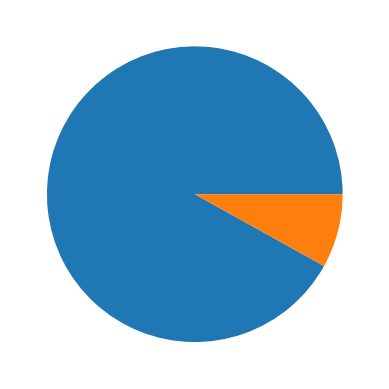

In [ ]:
aux = app_data["TARGET"].value_counts(normalize=True)
print(aux.apply(lambda x: "{:.2f} %".format(x*100)), "\n")
plt.pie(aux)
plt.show()

# ***Selección de Variables***

Por toda la exploración con el dataset las variables que vamos a considerar serán...

In [ ]:
selected_columns = ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'Cash loans',
 'WEEKEND',
 'FEMALE']

In [ ]:
[col for col in app_data.columns.tolist() if col.startswith("YEARS")]

['YEARS_EMPLOYED',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'YEARS_BIRTH_FACTOR_(19.999, 28.0]',
 'YEARS_BIRTH_FACTOR_(28.0, 32.0]',
 'YEARS_BIRTH_FACTOR_(32.0, 35.0]',
 'YEARS_BIRTH_FACTOR_(35.0, 39.0]',
 'YEARS_BIRTH_FACTOR_(39.0, 43.0]',
 'YEARS_BIRTH_FACTOR_(43.0, 47.0]',
 'YEARS_BIRTH_FACTOR_(47.0, 51.0]',
 'YEARS_BIRTH_FACTOR_(51.0, 56.0]',
 'YEARS_BIRTH_FACTOR_(60.0, 69.0]',
 'YEARS_REGISTRATION_FACTOR_(-0.001, 1.0]',
 'YEARS_REGISTRATION_FACTOR_(1.0, 4.0]',
 'YEARS_REGISTRATION_FACTOR_(4.0, 6.0]',
 'YEARS_REGISTRATION_FACTOR_(6.0, 9.0]',
 'YEARS_REGISTRATION_FACTOR_(9.0, 12.0]',
 'YEARS_REGISTRATION_FACTOR_(12.0, 14.0]',
 'YEARS_REGISTRATION_FACTOR_(14.0, 18.0]',
 'YEARS_REGISTRATION_FACTOR_(18.0, 22.0]',
 'YEARS_REGISTRATION_FACTOR_(22.0, 27.0]']

In [ ]:
def col_desc(col: str):
    global descripcion
    display(descripcion.query(f"Row == '{col}'")[["Row", "Description"]])

In [ ]:
def selection(data: pd.DataFrame, x: str, starts: bool, y: str = ""):
    global selected_columns
    if y != "":
        col_desc(y)
    else:
        col_desc(x)

    print("\n")

    if starts:
        cols = [col for col in app_data.columns if col.startswith(x)]+["TARGET"]
    else:
        cols = [col for col in app_data.columns if x in col]+["TARGET"]
    aux = app_data[cols].query("TARGET == 1").sum()
    print((aux/aux["TARGET"]).drop("TARGET").sort_values(ascending=False).head(3))
    selected_columns += aux.index.tolist()

In [ ]:
selection(app_data, "YEARS_REGISTRATION", True, "DAYS_REGISTRATION")

,Row,Description
19,DAYS_REGISTRATION,How many days before the application did client change his registration




YEARS_REGISTRATION_FACTOR_(1.0, 4.0]       0.138307
YEARS_REGISTRATION_FACTOR_(9.0, 12.0]      0.128115
YEARS_REGISTRATION_FACTOR_(-0.001, 1.0]    0.125681
dtype: float64


In [ ]:
selection(app_data, "YEARS_BIRTH", True, "DAYS_BIRTH")

,Row,Description
17,DAYS_BIRTH,Client's age in days at the time of application




YEARS_BIRTH_FACTOR_(19.999, 28.0]    0.174039
YEARS_BIRTH_FACTOR_(28.0, 32.0]      0.135047
YEARS_BIRTH_FACTOR_(35.0, 39.0]      0.124938
dtype: float64


In [ ]:
[col for col in app_data.columns.tolist() if "TYPE" in col]

['NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'OCCUPATION_TYPE_Core staff',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Other',
 'OCCUPATION_TYPE_Sales staff',
 'ORGANIZATION_TYPE_Business',
 'ORGANIZATION_TYPE_Industry',
 'ORGANIZATION_TYPE_Medicine',
 'ORGANIZATION_TYPE_Other',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_Trade',
 'ORG

In [ ]:
selection(app_data, "NAME_TYPE_SUITE", True)

,Row,Description
11,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan




NAME_TYPE_SUITE_Unaccompanied    0.819690
NAME_TYPE_SUITE_Family           0.121101
dtype: float64


In [ ]:
app_data["Unaccompanied_Day_of_Loan"] = app_data["NAME_TYPE_SUITE_Unaccompanied"]
selected_columns.append("Unaccompanied_Day_of_Loan")

In [ ]:
selection(app_data, "NAME_INCOME_TYPE", True)

,Row,Description
12,NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave, )"




NAME_INCOME_TYPE_Working                 0.612807
NAME_INCOME_TYPE_Commercial associate    0.216290
NAME_INCOME_TYPE_Pensioner               0.120028
dtype: float64


In [ ]:
selection(app_data, "NAME_EDUCATION_TYPE", True)

,Row,Description
13,NAME_EDUCATION_TYPE,Level of highest education the client achieved




NAME_EDUCATION_TYPE_Secondary / secondary special    0.786557
NAME_EDUCATION_TYPE_Higher education                 0.161495
NAME_EDUCATION_TYPE_Incomplete higher                0.035072
dtype: float64


In [ ]:
selection(app_data, "NAME_HOUSING_TYPE", True)

,Row,Description
15,NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)"




NAME_HOUSING_TYPE_House / apartment      0.857113
NAME_HOUSING_TYPE_With parents           0.069772
NAME_HOUSING_TYPE_Municipal apartment    0.038373
dtype: float64


In [ ]:
selection(app_data, "OCCUPATION_TYPE", True)

,Row,Description
28,OCCUPATION_TYPE,What kind of occupation does the client have




OCCUPATION_TYPE_Laborers       0.277273
OCCUPATION_TYPE_Other          0.221654
OCCUPATION_TYPE_Sales staff    0.167932
dtype: float64


In [ ]:
selection(app_data, "ORGANIZATION_TYPE", True)

,Row,Description
40,ORGANIZATION_TYPE,Type of organization where client works




ORGANIZATION_TYPE_Business         0.310489
ORGANIZATION_TYPE_Other            0.215795
ORGANIZATION_TYPE_Self-employed    0.157287
dtype: float64


In [ ]:
selection(app_data, "NAME_FAMILY_STATUS", True)

,Row,Description
14,NAME_FAMILY_STATUS,Family status of the client




NAME_FAMILY_STATUS_Married                 0.599109
NAME_FAMILY_STATUS_Single / not married    0.179403
NAME_FAMILY_STATUS_Civil marriage          0.119162
dtype: float64


In [ ]:
aux = app_data[[col for col in app_data.columns if "FLAG" in col]+["TARGET"]].query("TARGET == 1").sum()
(aux/aux["TARGET"]).drop("TARGET").sort_values(ascending=False)

FLAG_MOBIL          1.000000
FLAG_CONT_MOBILE    0.998143
FLAG_EMP_PHONE      0.879601
FLAG_OWN_REALTY     0.684560
FLAG_OWN_CAR        0.305207
FLAG_PHONE          0.244884
FLAG_WORK_PHONE     0.237457
FLAG_EMAIL          0.055166
dtype: float64

In [ ]:
selected_columns += ["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_EMP_PHONE", "FLAG_OWN_REALTY", "FLAG_OWN_CAR"]

In [ ]:
descripcion.query(f'Row == {["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_EMP_PHONE", "FLAG_OWN_REALTY", "FLAG_OWN_CAR"]}')[["Row", "Description"]]

,Row,Description
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
22,FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)"
23,FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)"
25,FLAG_CONT_MOBILE,"Was mobile phone reachable (1=YES, 0=NO)"


Las de EXT_SOURCE no las vamos a considerar ya que es un score proveniente de un fuente externa según la descripción.

In [ ]:
# Variables restantes
lista = np.array([col for col in app_data.columns if col not in selected_columns])
lista = lista[[False if col.startswith("YEARS") or col.startswith("AMT") or col.startswith("FLAG") or col.startswith("EXT_SOURCE") else True for col in lista]]

lista.tolist()

['CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE']

In [ ]:
app_data[lista.tolist()+["TARGET"]].query("TARGET == 1")[lista.tolist()].describe().loc["min":"max"]

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
min,0.0,0.000533,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.009630,7.0,2.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.018634,10.0,2.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,0.025164,13.0,3.0,2.0,2.0,14.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
max,11.0,0.072508,91.0,13.0,3.0,3.0,23.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,6.0


In [ ]:
descripcion.query(f"Row == {[col for col in app_data.columns if col.startswith('REGION')]}")

,Unnamed: 0,Table,Row,Description,Special
16,19,application_data,REGION_POPULATION_RELATIVE,Normalized population of region where client lives (higher number means the client lives in more populated region),normalized
30,33,application_data,REGION_RATING_CLIENT,"Our rating of the region where client lives (1,2,3)",NaN
31,34,application_data,REGION_RATING_CLIENT_W_CITY,"Our rating of the region where client lives with taking city into account (1,2,3)",NaN


In [ ]:
descripcion.query(f"Row == {[col for col in app_data.columns if 'LIVE' in col]}")

,Unnamed: 0,Table,Row,Description,Special
34,37,application_data,REG_REGION_NOT_LIVE_REGION,"Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)",NaN
36,39,application_data,LIVE_REGION_NOT_WORK_REGION,"Flag if client's contact address does not match work address (1=different, 0=same, at region level)",NaN
37,40,application_data,REG_CITY_NOT_LIVE_CITY,"Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)",NaN
39,42,application_data,LIVE_CITY_NOT_WORK_CITY,"Flag if client's contact address does not match work address (1=different, 0=same, at city level)",NaN


In [ ]:
variables_descriptivas = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",

    "YEARS_REGISTRATION_FACTOR_(1.0, 4.0]",
    "YEARS_REGISTRATION_FACTOR_(9.0, 12.0]",
    "YEARS_REGISTRATION_FACTOR_(-0.001, 1.0]",

    "YEARS_BIRTH_FACTOR_(19.999, 28.0]",
    "YEARS_BIRTH_FACTOR_(28.0, 32.0]",
    "YEARS_BIRTH_FACTOR_(35.0, 39.0]",

    "Cash loans",
    "Unaccompanied_Day_of_Loan",
    "FEMALE",

    "NAME_INCOME_TYPE_Working",
    "NAME_INCOME_TYPE_Commercial associate",
    "NAME_INCOME_TYPE_Pensioner",

    "NAME_EDUCATION_TYPE_Secondary / secondary special",
    "NAME_EDUCATION_TYPE_Higher education",

    "NAME_HOUSING_TYPE_House / apartment",
    "NAME_HOUSING_TYPE_With parents",

    "OCCUPATION_TYPE_Laborers",
    "OCCUPATION_TYPE_Other",
    "OCCUPATION_TYPE_Sales staff",

    "ORGANIZATION_TYPE_Business",
    "ORGANIZATION_TYPE_Other",
    "ORGANIZATION_TYPE_Self-employed",

    "AMT_REQ_CREDIT_BUREAU_YEAR",

    "NAME_FAMILY_STATUS_Married",
    "NAME_FAMILY_STATUS_Single / not married",
    "NAME_FAMILY_STATUS_Civil marriage",

    "FLAG_MOBIL",
    "FLAG_CONT_MOBILE",
    "FLAG_EMP_PHONE",
    "FLAG_OWN_REALTY",
    "FLAG_OWN_CAR",

    "REGION_POPULATION_RELATIVE",
    "REG_REGION_NOT_LIVE_REGION",
    "LIVE_REGION_NOT_WORK_REGION",

    "OWN_CAR_AGE",
    "CNT_CHILDREN"]

In [ ]:
len(variables_descriptivas)

40

## Montos superiores

In [ ]:
app_data.loc[:, ["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: "{:,.2f}".format(x))

,AMT_INCOME_TOTAL
count,"299,996.00"
mean,"168,838.87"
std,"239,621.80"
min,"25,650.00"
25%,"112,500.00"
50%,"146,700.00"
75%,"202,500.00"
max,"117,000,000.00"


Observamos que se dispara de 200 mil a 117 millones en los registros del ingreso del 3er cuantil al último. Veremos a continuación cuantos tienen un ingreso millonrario.

In [ ]:
app_data.loc[app_data["AMT_INCOME_TOTAL"] > 999_999.99, ["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: "{:,.2f}".format(x))

,AMT_INCOME_TOTAL
count,246.00
mean,"2,166,188.32"
std,"7,514,131.01"
min,"1,001,826.00"
25%,"1,125,000.00"
50%,"1,350,000.00"
75%,"1,788,750.00"
max,"117,000,000.00"


Tenemos 246 clientes con un ingreso superior al 1 millón pero volvemos a ver que del 3er cuantil al último se dispara, veamos cuantos registros tenemos mayores al 3er cuantil.

In [ ]:
q_3rd = app_data.loc[app_data["AMT_INCOME_TOTAL"] > 999_999.99, "AMT_INCOME_TOTAL"].quantile(0.75)

In [ ]:
app_data.loc[app_data["AMT_INCOME_TOTAL"] > q_3rd, ["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: "{:,.2f}".format(x))

,AMT_INCOME_TOTAL
count,62.00
mean,"4,886,198.27"
std,"14,718,736.08"
min,"1,800,000.00"
25%,"1,890,000.00"
50%,"2,250,000.00"
75%,"3,150,000.00"
max,"117,000,000.00"


Nuevamente volveremos a aplicar la ejecución anterior.

In [ ]:
q_3rd_second = app_data.loc[app_data["AMT_INCOME_TOTAL"] > q_3rd, "AMT_INCOME_TOTAL"].quantile(0.75)

In [ ]:
app_data.loc[app_data["AMT_INCOME_TOTAL"] > q_3rd_second, ["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: "{:,.2f}".format(x))

,AMT_INCOME_TOTAL
count,15.00
mean,"13,598,343.30"
std,"28,918,637.68"
min,"3,375,000.00"
25%,"3,712,500.00"
50%,"4,500,000.00"
75%,"7,875,000.00"
max,"117,000,000.00"


Volveremos a ejecutar una última vez la misma ejecución. Aunque estos ingresos ya se nos hacen elevados de por sí.

In [ ]:
q_3rd_third = app_data.loc[app_data["AMT_INCOME_TOTAL"] > q_3rd_second, "AMT_INCOME_TOTAL"].quantile(0.75)

In [ ]:
app_data.loc[app_data["AMT_INCOME_TOTAL"] > q_3rd_third, ["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: "{:,.2f}".format(x))

,AMT_INCOME_TOTAL
count,4.00
mean,"39,375,022.50"
std,"51,880,258.46"
min,"9,000,000.00"
25%,"12,375,000.00"
50%,"15,750,045.00"
75%,"42,750,067.50"
max,"117,000,000.00"


Vamos a eliminar los registros que sean mayores al valor mínimo del describe anterior.

In [ ]:
ingresos_altos = app_data.loc[app_data["AMT_INCOME_TOTAL"] > q_3rd_third, "AMT_INCOME_TOTAL"].sort_values().apply(lambda x: "{:,.2f}".format(x)).reset_index()
display(ingresos_altos)

,index,AMT_INCOME_TOTAL
0,77768,"9,000,000.00"
1,246858,"13,500,000.00"
2,203693,"18,000,090.00"
3,12840,"117,000,000.00"


In [ ]:
app_data.drop(app_data.loc[app_data["AMT_INCOME_TOTAL"] >= 9_000_000, "AMT_INCOME_TOTAL"].index, inplace=True)

In [ ]:
def plot_avg_prop(data: pd.DataFrame, col: str, q: float, color: str):
    aux = pd.concat([pd.qcut(data[col], q=q, duplicates='drop'), data["TARGET"]], axis=1)
    N = aux.shape[0]

    # Medidas
    grouped = aux.groupby(by=col).agg(
        Total_Count=('TARGET', 'size'),
        Target_1_Count=('TARGET', lambda x: (x==1).sum())
        )

    grouped["Proportion"] = grouped["Total_Count"]/N
    grouped[f"Avg {col}"] = grouped["Target_1_Count"]/grouped["Total_Count"]

    grouped = grouped.sort_index().reset_index()
    grouped[col] = grouped[col].astype(str)

    # Gráfico
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.lineplot(data=grouped, x=col, y=f"Avg {col}", label=f"Avg {col}", linestyle="--", marker="o", color="k", ax=ax)
    sns.barplot(data=grouped, x=col, y="Proportion", label="Proportion", color=color, ax=ax)

    ax.tick_params(axis='x', rotation=45)

    plt.legend()

    # # Define el nombre del eje X
    plt.xlabel(col)

    plt.show()

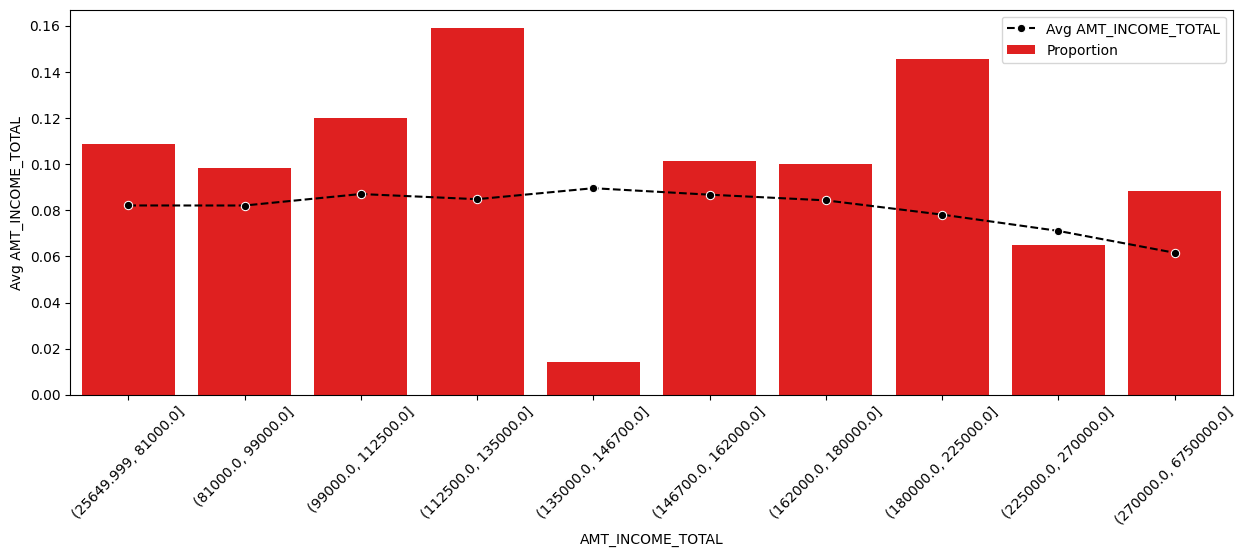

In [ ]:
plot_avg_prop(data=app_data, col="AMT_INCOME_TOTAL", q=10, color="red")

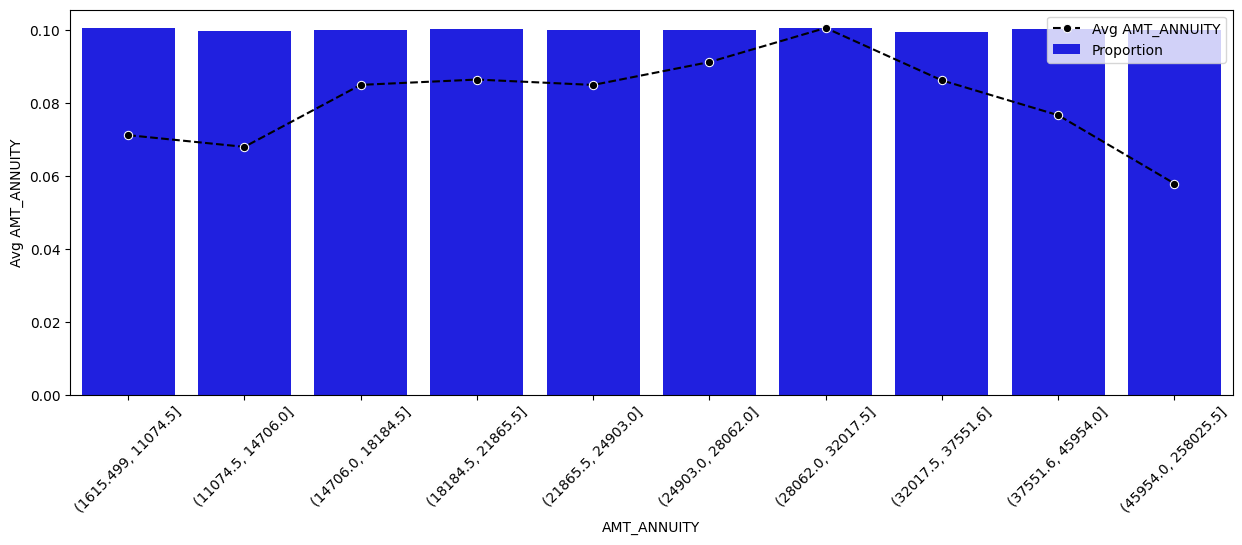

In [ ]:
plot_avg_prop(data=app_data, col="AMT_ANNUITY", q=10, color="blue")

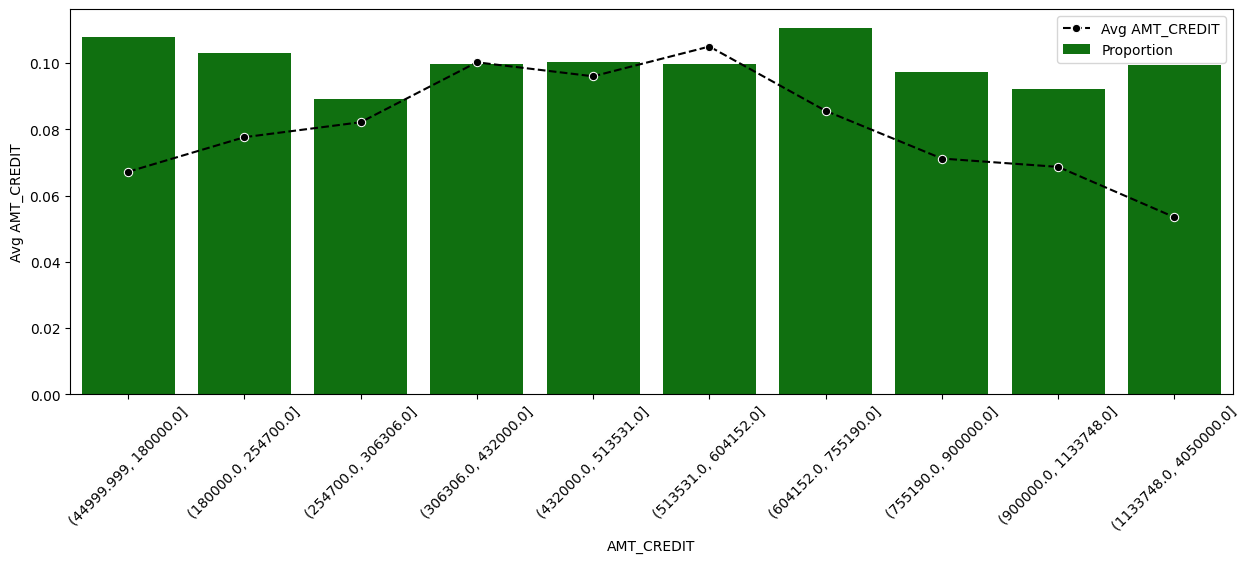

In [ ]:
plot_avg_prop(data=app_data, col="AMT_CREDIT", q=10, color="green")

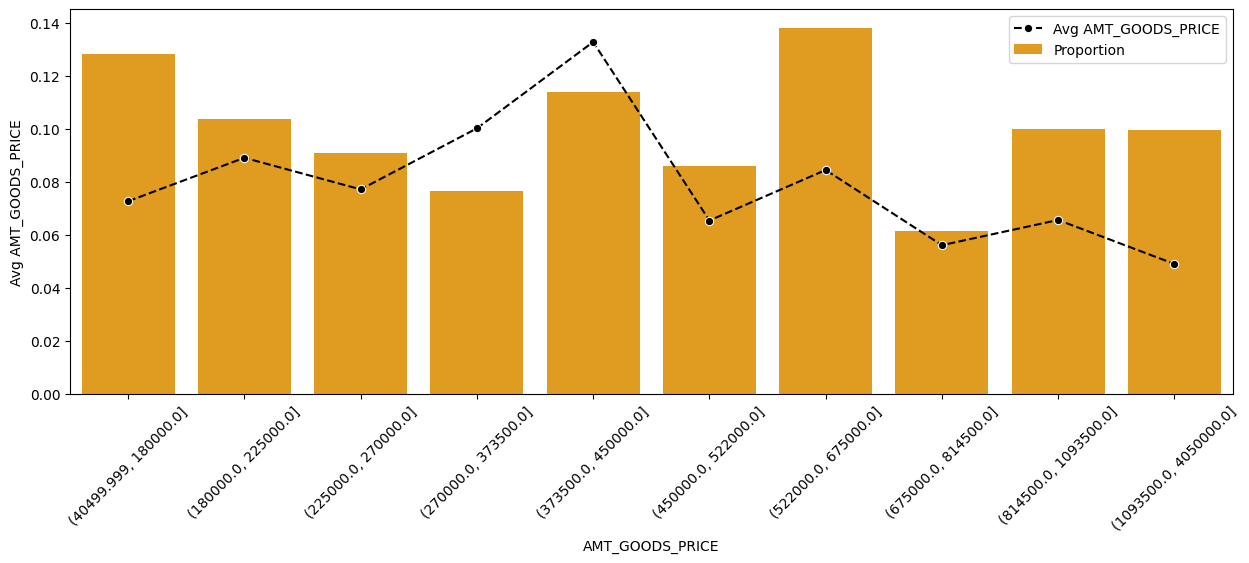

In [ ]:
plot_avg_prop(data=app_data, col="AMT_GOODS_PRICE", q=10, color="orange")

En las 2 últimas gráficas notamos que los intervalos entre AMT_GOODS_PRICE y AMT_CREDIT son muy similares. Lo cual tiene sentido porque se está solicitando el crédito hipotecario entonces este tendría que ser similar al valor real de la casa y es la razón por la que nos estaremos quedando con AMT_CREDIT para evitar correlación con AMT_GOODS_PRICE más adelante.

In [ ]:
data_copy = app_data.loc[:, variables_descriptivas+["TARGET"]].copy()

In [ ]:
data_copy = data_copy.loc[:, data_copy.columns != "AMT_GOODS_PRICE"]

In [ ]:
def dummies_amt(col: str, data: pd.DataFrame, q: float):
    data[col] = pd.qcut(data[col], q=q)
    aux = data.query("TARGET == 1")[col].value_counts(normalize=True).index[-1] # valor con menos registros en la variable respuesta
    dummies = pd.get_dummies(data[col], dtype=int, prefix=col)
    dummies.drop(f"{col}_{aux}", axis=1, inplace=True)

    merged = pd.merge(data.drop(col, axis=1), dummies, left_index=True, right_index=True)
    return merged

In [ ]:
for col in ("AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT"):
    data_copy = dummies_amt(col=col, data=data_copy, q=10)

In [ ]:
descripcion.query(f"Row == {['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE']}")

,Unnamed: 0,Table,Row,Description,Special
22,25,application_data,FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)",NaN
23,26,application_data,FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)",NaN
25,28,application_data,FLAG_CONT_MOBILE,"Was mobile phone reachable (1=YES, 0=NO)",NaN


In [ ]:
data_copy = data_copy.loc[:, data_copy.columns[[col not in ("FLAG_EMP_PHONE", "FLAG_CONT_MOBILE") for col in data_copy.columns]]]

In [ ]:
data_copy.shape

(299992, 62)

## Variables descriptivas y Respuesta

In [ ]:
X = data_copy.loc[:, data_copy.columns != "TARGET"]

In [ ]:
y = app_data.loc[:, "TARGET"]

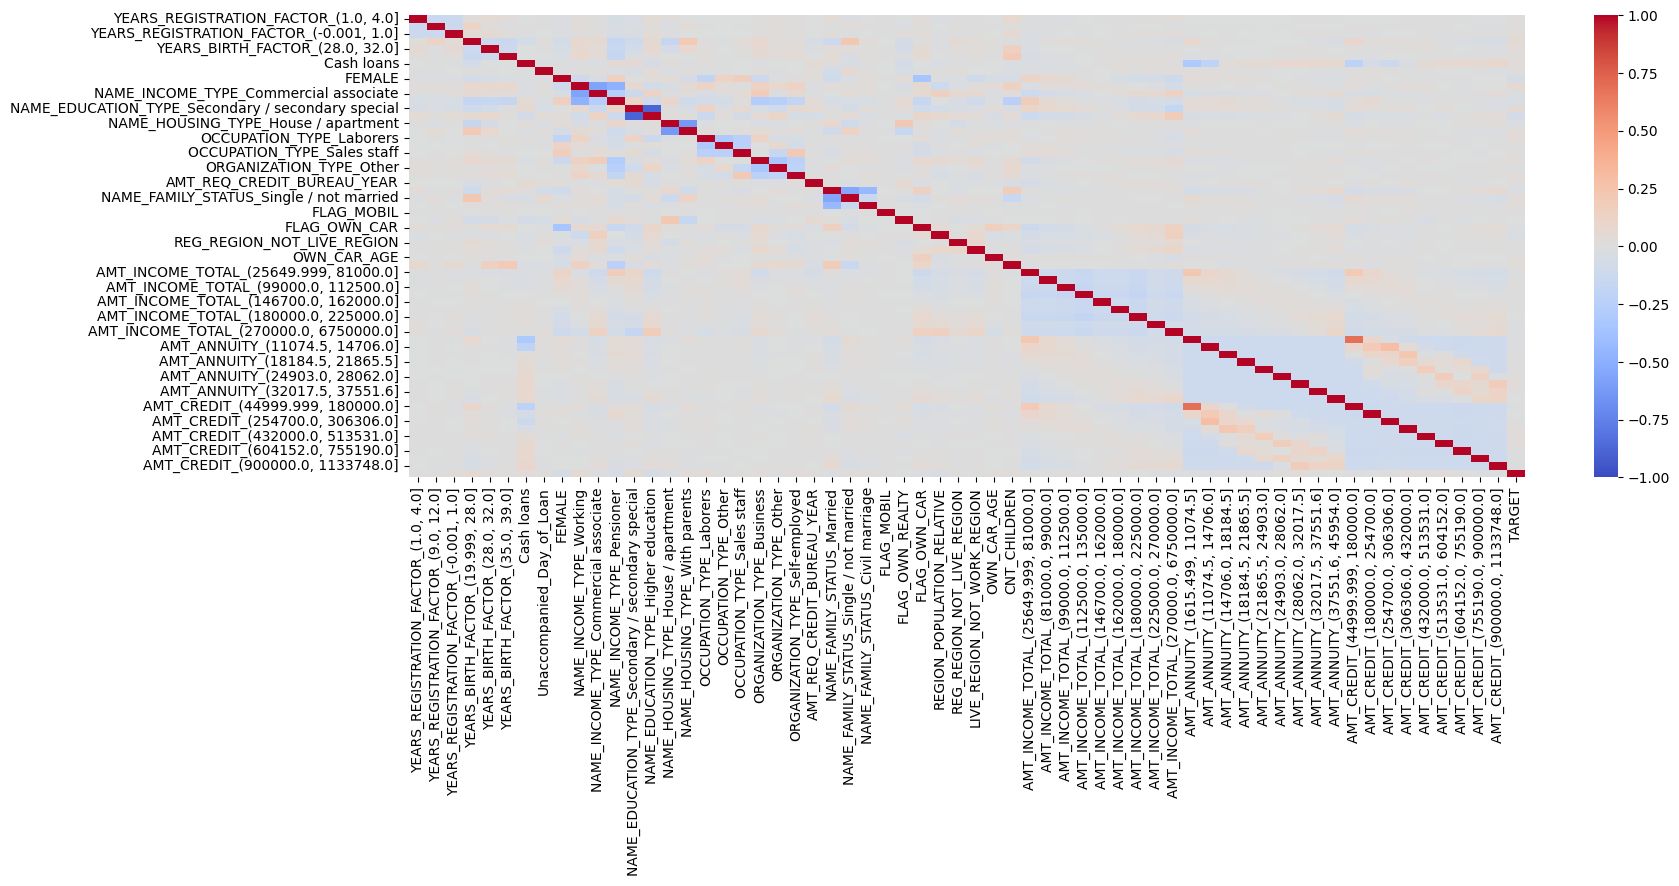

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), vmin=-1, vmax=1, cmap="coolwarm", ax=ax)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Función para calcular VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

Después de correr el VIF decidimos poner una tolarancia de 8.5 en el VIF y como resultado obtenemos las siguientes columnas con alta correlación.

In [ ]:
data_copy.loc[:, [col for col in data_copy.columns if col.startswith("NAME_EDUCATION_TYPE")]].sum()/data_copy.shape[0]

NAME_EDUCATION_TYPE_Secondary / secondary special    0.710169
NAME_EDUCATION_TYPE_Higher education                 0.243473
dtype: float64

In [ ]:
descripcion.query(f"Row == 'NAME_EDUCATION_TYPE'")

,Unnamed: 0,Table,Row,Description,Special
13,16,application_data,NAME_EDUCATION_TYPE,Level of highest education the client achieved,NaN


In [ ]:
data_copy.rename(columns={"NAME_EDUCATION_TYPE_Higher education": "Higher_education"}, inplace=True)

In [ ]:
data_copy.loc[:, [col for col in data_copy.columns if col.startswith("NAME_HOUSING_TYPE")]].sum()/data_copy.shape[0]

NAME_HOUSING_TYPE_House / apartment    0.887320
NAME_HOUSING_TYPE_With parents         0.048265
dtype: float64

In [ ]:
descripcion.query(f"Row == 'NAME_HOUSING_TYPE'")

,Unnamed: 0,Table,Row,Description,Special
15,18,application_data,NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)",NaN


In [ ]:
data_copy.rename(columns={"NAME_HOUSING_TYPE_House / apartment": "Homeowner"}, inplace=True)

In [ ]:
data_copy.loc[:, [col for col in data_copy.columns if col.startswith("NAME_INCOME_TYPE")]].sum()/data_copy.shape[0]

NAME_INCOME_TYPE_Working                 0.516370
NAME_INCOME_TYPE_Commercial associate    0.233003
NAME_INCOME_TYPE_Pensioner               0.179878
dtype: float64

En las dos primeras proporciones vemos que tenemos 2 variables resultantes (después de haber sido convertidas a dummies) y que esas variables representan cerca del 100% por lo que podríamos eliminar la contraparte para evitar la correlación y de hecho en el VIF si nos salen con correlación alta. Y en la última que es la que aparece arriba de esta celda, vemos que Working es cerca del 50%, entonces se habla casi perfectamente con Commercial associate o bien con Pensioner, por lo que decidimos eliminarla como nos sugiere el VIF.

In [ ]:
# Filtrar variables con VIF alto (por ejemplo, VIF > 8.5)
high_vif_columns = [
  'NAME_INCOME_TYPE_Working',
  'NAME_EDUCATION_TYPE_Secondary / secondary special',
  'NAME_HOUSING_TYPE_With parents',
  'FLAG_MOBIL',
  'AMT_INCOME_TOTAL_(25649.999, 81000.0]',
  'AMT_INCOME_TOTAL_(99000.0, 112500.0]',
  'AMT_INCOME_TOTAL_(112500.0, 135000.0]',
  'AMT_INCOME_TOTAL_(180000.0, 225000.0]'
  ]

In [ ]:
X = X.drop(columns = high_vif_columns)
y = y.drop(columns = high_vif_columns)
X_mod = X
y_mod = y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, "Dimesiones")

(209994, 53) Dimesiones


In [ ]:
print(y_train.shape, "Dimensiones")

(209994,) Dimensiones


In [ ]:
print(X.shape[1], "variables")

53 variables


In [ ]:
X_train.columns

Index(['YEARS_REGISTRATION_FACTOR_(1.0, 4.0]',
       'YEARS_REGISTRATION_FACTOR_(9.0, 12.0]',
       'YEARS_REGISTRATION_FACTOR_(-0.001, 1.0]',
       'YEARS_BIRTH_FACTOR_(19.999, 28.0]', 'YEARS_BIRTH_FACTOR_(28.0, 32.0]',
       'YEARS_BIRTH_FACTOR_(35.0, 39.0]', 'Cash loans',
       'Unaccompanied_Day_of_Loan', 'FEMALE',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_HOUSING_TYPE_House / apartment', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Other', 'OCCUPATION_TYPE_Sales staff',
       'ORGANIZATION_TYPE_Business', 'ORGANIZATION_TYPE_Other',
       'ORGANIZATION_TYPE_Self-employed', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Civil marriage', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR',
       'REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'OWN_CAR_AGE

In [ ]:
y_train.head(20)

84607     0
193104    0
163834    0
148626    0
111916    0
194350    0
102916    0
181593    0
173915    0
211951    1
12280     0
207713    0
29632     0
142949    0
209145    0
214355    0
17500     0
209441    0
87449     0
257087    0
Name: TARGET, dtype: int64

# Modelo 1 (Regresion Logistica)

Recordemos que este modelo es una caso particular del modelo de regresion lineal; con la carasteristica de que se vuelve en un modelo de clasificasion supervisada ***(un modelo que ya conocemos lo mas general de su metodologia)***....

## Proporciones y sobremuestro

Veamos primero como es la proporcion de nuestro "TARGET" ya que es indispensable que tenga mas de "1" y que los "0" que son los casos que nos interesa....

In [ ]:
y.value_counts()      # veamos la contabilidad de la "Y"

TARGET
0    275757
1     24235
Name: count, dtype: int64

In [ ]:
Y = pd.DataFrame(y)     # por esta ocasion convertimos a "y" en una datframe "Y"
Y.head(5)

,TARGET
0,1
1,0
2,0
3,0
4,0


<ipython-input-178-5775b0fe8ade>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'TARGET', data = Y, palette='hls')        # hacemos las grafica de propociones


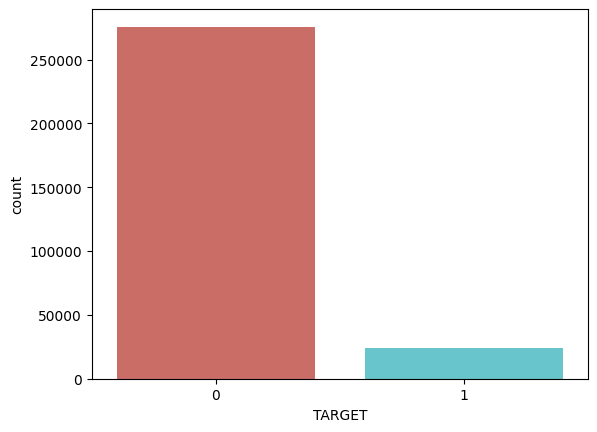

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
sns.countplot(x = 'TARGET', data = Y, palette='hls')        # hacemos las grafica de propociones
plt.show()
plt.savefig('Grafica_Conteo')

Podemos ver que no hay mucha informacion de los casos de las personas tuvieron dificultades para pagar el prestamos y no pudieron *(y la siguiente celda lo corrobora)*......

In [ ]:
# Exploremos las proporciones de nuestras "y" que ofrece

people_0 = len(Y[Y['TARGET'] == 0])        # numero de personas que no pagaron
people_1 = len(Y[Y['TARGET'] == 1])        # numero de personas que pagaron

Proporcion_no_exitos = round(people_0 / (people_0 + people_1), 4)
print("% de personas que pagaron satisfactoriamente:", Proporcion_no_exitos*100)      # sacamos la proporcion de los subcritos

Proporcion_exitos = round(people_1 / (people_0 + people_1), 4)
print("% de personas que no pagaron por dificultades:", Proporcion_exitos*100)                # sacamos la proporcion de los no subcritos

% de personas que pagaron satisfactoriamente: 91.92
% de personas que no pagaron por dificultades: 8.08


## Sobremuestreo

El remuestreo es un forma de dar un balance de nuestros datos *(especiamente por nuestro "TARGET")* para hacer que nuestro modelo de regresion logistica no tenga problemas de clasificacion....

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Creamos un remuestreo para que la variable objetivo esté igualmente proporcionada
over_sample = SMOTE(random_state = 0)
os_X, os_y = over_sample.fit_resample(X_train, y_train)
os_X = pd.DataFrame(data = os_X, columns = X_train.columns)
os_y = pd.DataFrame(data = os_y, columns = ['TARGET'])

In [ ]:
# Podemos revisar los siguientes valores
print("Longitud de la data después del oversample", len(os_X))
print("Número de ceros en la variable objetivo", len(os_y[os_y["TARGET"]==0]))
print("Número de ceros en la variable objetivo", len(os_y[os_y["TARGET"]==1]))
print("Proporción de ceros en la variable objetivo", len(os_y[os_y["TARGET"]==0])/len(os_X))
print("Proporción de ceros en la variable objetivo", len(os_y[os_y["TARGET"]==1])/len(os_X))

Longitud de la data después del oversample 386092
Número de ceros en la variable objetivo 193046
Número de ceros en la variable objetivo 193046
Proporción de ceros en la variable objetivo 0.5
Proporción de ceros en la variable objetivo 0.5


## Recursive feature selection/elimination

hecho el remuestreo, creo que es necesario ver que V.A.s son importantes y que otras nos para nuestro modelo; para ello vamos a verlo por lo que es **"RFE"**....

In [ ]:
from sklearn.feature_selection import RFE     # importamos las funcion de "feature selection" y "regresion logistica"
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()       # almacenamos el modelo en este variable

rfe = RFE(logreg)       # esta funcion nos da los P-value de las V.A. independientes de modelo de regresion logistica

rfe = rfe.fit(os_X, os_y.values.ravel())          # entramos el modelo de RFE

print(rfe.support_)        # imprimimos los valores que son significativos y el ranking de ellos de las V.A.s X
print(rfe.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False  True  True  True False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[18 17 19 25 22 16 21 23  6 15  2  1 20 13 12 14 10  8  9 27  4  5  3 24
  7  1  1  1 28 26 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


El **RFE** es un metodo en el cual se trata encontrar la combinacion perfecta en el que las V.A.s de X genere significancia para nuestro modelo de regresion logistica; las 2 lista nos indica la posicion respectivamente de que V.A.s mejores y que V.A.s aceptamos o no....

In [ ]:
columns_final_vars = X_train.columns.values.tolist()      # hacemos una lista de las V.A.s de "X_train"
X_lista = [i for i in columns_final_vars]
X_lista

['YEARS_REGISTRATION_FACTOR_(1.0, 4.0]',
 'YEARS_REGISTRATION_FACTOR_(9.0, 12.0]',
 'YEARS_REGISTRATION_FACTOR_(-0.001, 1.0]',
 'YEARS_BIRTH_FACTOR_(19.999, 28.0]',
 'YEARS_BIRTH_FACTOR_(28.0, 32.0]',
 'YEARS_BIRTH_FACTOR_(35.0, 39.0]',
 'Cash loans',
 'Unaccompanied_Day_of_Loan',
 'FEMALE',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_HOUSING_TYPE_House / apartment',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Other',
 'OCCUPATION_TYPE_Sales staff',
 'ORGANIZATION_TYPE_Business',
 'ORGANIZATION_TYPE_Other',
 'ORGANIZATION_TYPE_Self-employed',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Civil marriage',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'REGION_POPULATION_RELATIVE',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'OWN_CAR_AGE',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL_(81000.0, 99000.0]',
 'AMT_INCOME_TOTAL_(146

In [ ]:
# con esta celda, hacemos que haga una lista de los posiciones de las V.A.s a quitar

lista_booleans = [False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]

posiciones_false = []

for i, valor in enumerate(lista_booleans):
  if valor == False:
    posiciones_false.append(i)

print(posiciones_false)  # Salida: [1, 2, 4]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 29, 30]


In [ ]:
for i in sorted(posiciones_false, reverse = True):
  del X_lista[i]

print(X_lista)    # quitamos las V.A.s de las listas de V.A.s

['NAME_EDUCATION_TYPE_Higher education', 'REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'AMT_INCOME_TOTAL_(146700.0, 162000.0]', 'AMT_INCOME_TOTAL_(162000.0, 180000.0]', 'AMT_INCOME_TOTAL_(225000.0, 270000.0]', 'AMT_INCOME_TOTAL_(270000.0, 6750000.0]', 'AMT_ANNUITY_(1615.499, 11074.5]', 'AMT_ANNUITY_(11074.5, 14706.0]', 'AMT_ANNUITY_(14706.0, 18184.5]', 'AMT_ANNUITY_(18184.5, 21865.5]', 'AMT_ANNUITY_(21865.5, 24903.0]', 'AMT_ANNUITY_(24903.0, 28062.0]', 'AMT_ANNUITY_(28062.0, 32017.5]', 'AMT_ANNUITY_(32017.5, 37551.6]', 'AMT_ANNUITY_(37551.6, 45954.0]', 'AMT_CREDIT_(44999.999, 180000.0]', 'AMT_CREDIT_(180000.0, 254700.0]', 'AMT_CREDIT_(254700.0, 306306.0]', 'AMT_CREDIT_(306306.0, 432000.0]', 'AMT_CREDIT_(432000.0, 513531.0]', 'AMT_CREDIT_(513531.0, 604152.0]', 'AMT_CREDIT_(604152.0, 755190.0]', 'AMT_CREDIT_(755190.0, 900000.0]', 'AMT_CREDIT_(900000.0, 1133748.0]']


In [ ]:
X_train_new = os_X[X_lista]         # Renombramos a las particiones y las cambiamos a base de "RFE"
y_train_new = os_y
X_test_new = X_test[X_lista]

In [ ]:
print(X_train_new.shape, "Dimensiones")       # vemos las dimensiones de las particiones nuevas
print(y_train_new.shape, "Dimensiones")

(386092, 26) Dimensiones
(386092, 1) Dimensiones


## Ejecucion del modelo

Ahora para ser mas equitativos vamos a crear valores simulados por medio de **"make_classification"**, para cada particiones de las cuales vamos ver que es lo que ocurre....

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Crear los datos con make_classification
X_prue, y_prue = make_classification(n_samples = 299992, n_features = 26)
X_train_simul, X_test_simul, y_train_simul, y_test_simul = train_test_split(X_prue, y_prue, test_size=0.3, random_state = 13)

In [ ]:
y_train_new.shape     # si la marca una columna; entonces ejecuta el codigo siguiente

(386092, 1)

In [ ]:
y_train_new = y_train_new['TARGET'].iloc[:].values

In [ ]:
X_combined_train = np.concatenate((X_train_new, X_train_simul), axis = 0)
y_combined_train = np.concatenate((y_train_new, y_train_simul), axis = 0)

X_combined_test = np.concatenate((X_test_new, X_test_simul), axis = 0)
y_combined_test = np.concatenate((y_test, y_test_simul), axis = 0)

Para esta ocasion, vamos a ocupar la libreria de "statsmodels" ya que a comparacion de "sklearn"; hay detalles de que se ocupa pseudo-matrices de nuestras X. Esto ultimo puede causar lo que se altere la informacion.....

In [ ]:
import statsmodels.api as sm     # Importamos el modelo de regresion logistica y algunas funciones mas

Para poder usar el modelo de regresion logistica; se requiere que las particiones de "X" contemple una vector constantes de unos

In [ ]:
X_train_sm = sm.add_constant(X_combined_train)
X_test_sm = sm.add_constant(X_combined_test)

# Crear y ajustar el modelo con la parte de "Train"
modelo = sm.Logit(y_combined_train, X_train_sm)
resulto = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.570180
         Iterations 7


Pero nos falta ver como las conclusiones que nos puede arrojar el **"summery"** sobre nuestro modelo entrenado...

In [ ]:
print(resulto.summary())       # Imprimir resumen del modelo (summery)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               596086
Model:                          Logit   Df Residuals:                   596059
Method:                           MLE   Df Model:                           26
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.1774
Time:                        20:48:53   Log-Likelihood:            -3.3988e+05
converged:                       True   LL-Null:                   -4.1318e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2589      0.004     70.630      0.000       0.252       0.266
x1            -0.3622      0.005    -68.803      0.000      -0.372      -0.352
x2             0.0053      0.006      0.840      0.4

Que podemos concluir de este resumen????; hay detalles de los cuales hay que preocuparnos y estos son:

*   La **seu-R** es de 0.2856; que es menor del $30%$ y no esta siendo eficiente en su predicciones.

*   Apesar de contar todas estas V.A.s; no tenemos problemas algunos de significansia *(por el **P-Value** < $0,5%$ y los **IC** no contempla con el cero)*

*   Apesar de la limpieza del dataframe exastiva; bajo nuestra perpectiva no hay mas de que se pueda hacer ara mejor el modelo *(todas la V.A.s por sentido comun; son relevante para la solucion a la problematica)*

In [ ]:
y_pred_log = resulto.predict(X_test_sm)       # Hacer predicciones sobre los datos de prueba

In [ ]:
print(y_pred_log.shape)       # vemos el tamano de las predicciones

(179996,)


In [ ]:
y_pred_log = (y_pred_log >= 0.5).astype(int)      # pero estas predicciones son porbabilidades, hay que convertirlas en respuesta binaria

In [ ]:
print(y_pred_log.shape)       # vemos el tamano de las predicciones no ya cambiado

(179996,)


In [ ]:
valores_unicos = np.unique(y_pred_log)          # tambien vemos si hay respuesta binaria
print("Valores únicos en y_pred_log:", valores_unicos)

Valores únicos en y_pred_log: [0 1]


Pasemos a ver como es el comportamiento de la regresion logistica de forma cuantitativa....

Aplicamos una forma grafica de la **"matriz de confusion"** de este modelo:

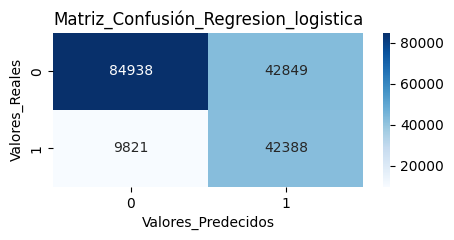

In [ ]:
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_combined_test, y_pred_log)   # aplicamos las comparativas con las parte de "y_test" y "y_pred_log"

plt.figure(figsize=(5, 2))    # establecemos la longitud de la grafica

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')        # Graficamos la matriz y colocamos leyendas
plt.xlabel('Valores_Predecidos')
plt.ylabel('Valores_Reales')
plt.title('Matriz_Confusión_Regresion_logistica')
plt.show()

Apesar de ver la matriz de confusion de manera invertida a como la conocemos, estamos detectando mucha recepcion verdaderos negativos ***(bajo este contexto nos quiere decir que hay mas personas que dan pagan sus deudas que las que no pueden)***. Y como es la Curva ROC que nos da este modelo....

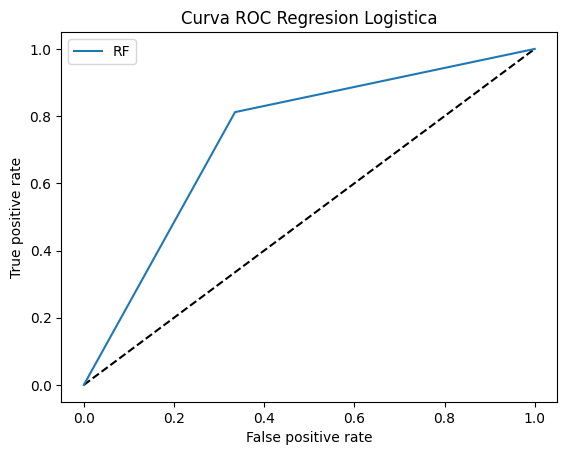

In [ ]:
from sklearn.metrics import roc_curve       # importamos la grafia de esta curva

fpr_lr, tpr_lr, thresholds = roc_curve(y_combined_test, y_pred_log)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC Regresion Logistica')
plt.legend(loc='best')
plt.show()

La curva ROC esta demasiado pegada a la recta identidad; lo que nos esta implicando que el modelo no esta haciendo su trabajo de realizar una "false positive rate" Vs "false positive rate"; de los verdaderos valores y sus prediccciones...

Y las metricas que miden las medidas de prediccion del modelo no nos lo confirma.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

accurary_log = round(accuracy_score(y_combined_test, y_pred_log) * 100, 4)
auc_log = roc_auc_score(y_combined_test, y_pred_log)
gini_log = 2 * auc_log - 1
ks_log = max(fpr_lr - tpr_lr)

print("En resumida cuentas; tenemos que hay....")
print("")
print(" -> Una precision de ", accurary_log,"%")
print("")
print(" -> Un AUC de ", auc_log)
print("")
print(" -> El GINI que se maneja es", gini_log)
print("")
print(" -> El estadistico KS es de ", ks_log)

En resumida cuentas; tenemos que hay....

 -> Una precision de  70.7382 %

 -> Un AUC de  0.7382874356221392

 -> El GINI que se maneja es 0.47657487124427833

 -> El estadistico KS es de  0.0


# Modelo 2 (K-Nearest Neighbors (K-NN))

Este modelo de clasificacion supervisada es un pequeno algoritmos que en resumidas cuentas trata de ver si un punto $X$ pertenece a un grupo o a otro por los $K$ puntos más cercanos **(de hay el nombre de *"vecinos mas cercano"*)**.....


y se determina por la mayoria del $K$ de un grupo. La siguiente ilustracion nos da una mejor visualizacion del modelo....

**Algoritmo de modelo:**

*   **PASO 1:** Elige el número K de vecinos

*   **PASO 2:** Tome los K vecinos más cercanos del nuevo punto de datos, según la distancia deseada; puede ser las siguiente...
    * Euclideana
    * Minkowski
    * Chebyshev (Maxima diferencia por entradas de los puntos)
    * Coseno (por diferencia de angulos)
*   **PASO 3:** Entre estos K vecinos, cuente la cantidad de puntos de datos en cada categoría

*   **PASO 4:** Asigne el nuevo punto de datos a la categoría donde contó la mayor cantidad de vecinos.

La siguiente ilustracion nos da una mejor visualizacion del modelo....

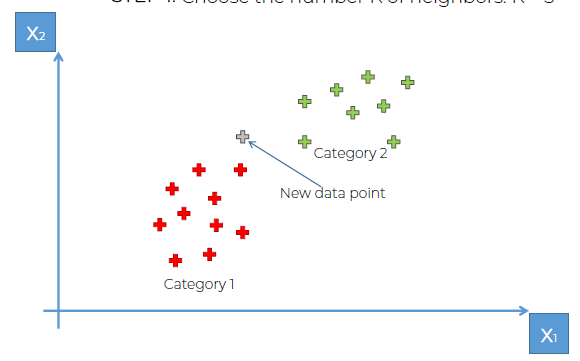

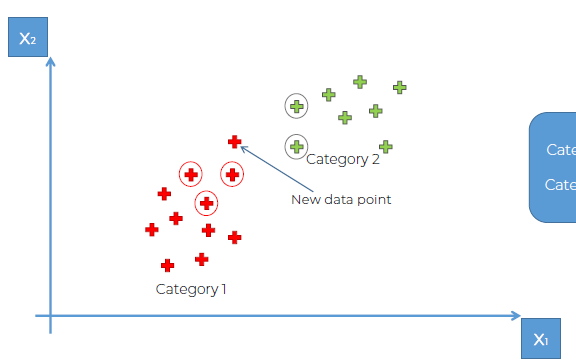

Para nuestro caso vamos a considerar lo que la distacia euclidiana ***(que un caso particular de la distancia de Minkowski con p = 2)*** ya que es el uso de otras metricas pueden agilizar el modelo pero es cuestionable la forma en que tan cerca estan los k-vecinos...

Pero la duda ahora es: **a cuantos vecinos los dejamos ?????**

Por desgracias ocupar un metodo de optimizacion para encontrara k-vecinos no es lo mas recomendable ya que carecemos del tiempo para su ejecucion ***(por las dimension de las V.A.s y los registros excesivos)*** y haremos lo siguiente:

*   Generamos aleatoriamente 25 "k-vecinos" entre un rango de 1 a 100 (el detalle es que creemos que el 100 puntos de 300,000 son suficiente para determinar la clasificaciones).

*   Ejecutamos los modelos 25 veces con los "k-vecinos" anteriores.

*   Escogemos el "k-vecino" con el maximo accuary mas alto.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier    # importamos al modelo de "K-nearest_neighbors"
from sklearn.metrics import accuracy_score          # tambien importamos la funcion de "accuary"

# establecemos una lista de 25 "k-vecinos"  entre 1 a 100
k_vecinos = [random.randint(1, 100) for _ in range(25)]

precisiones = []      # con esta lista, guardamos los "accuary"

for k in k_vecinos:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = accuracy_score(y_test, y_pred)
    precisiones.append(precision)

mejor_precision = max(precisiones)
mejor_k = k_vecinos[precisiones.index(mejor_precision)]

print("El mejor valor de k es:", mejor_k)

Ejecutamos el modelo con el "el mejor_k"....

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = mejor_k, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

In [ ]:
y_pred_knn = classifier.predict(X_test)   # estimamos las predicciones con este modelo

Ejecutamos la matriz de confusion y vemos otros parametros relevantes para la comparativa...

In [ ]:
from sklearn.metrics import confusion_matrix      # Traemos la matriz de confusion

cm_knn = confusion_matrix(y_test, y_pred_knn)   # aplicamos las comparativas con las parte de "y_test" y "y_pred_knn"

plt.figure(figsize=(5, 2))    # establecemos la longitud de la grafica

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')        # Graficamos la matriz y colocamos leyendas
plt.xlabel('Valores_Predecidos')
plt.ylabel('Valores_Reales')
plt.title('Matriz_Confusión_K-NN')
plt.show()

Pasamos a la parte de **la curva ROC** de este modelo...

In [ ]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test,y_pred_knn)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC K-NN')
plt.legend(loc='best')
plt.show()

Esta algo lamentable que **la curva ROC** que nos arroja pero es posible que necesitemos cuantificar ciertos estadisticos que nos represente el % que maneja el modelo con respecto a **la Tasa de Verdaderos Positivos** (TPR) contra **la Tasa de Falsos Positivos** (FPR).

Estos parametros ya tenemos previo conocimiento:

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

accurary_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 4)
auc_knn = roc_auc_score(y_test, y_pred_knn)
gini_knn = 2 * auc_knn - 1
ks_knn = max(fpr_lr - tpr_lr)

print("En resumida cuentas; tenemos que hay....")
print("")
print(" -> Una precision de ", accurary_knn,"%")
print("")
print(" -> Un AUC de ", auc_knn)
print("")
print(" -> El GINI que se maneja es", gini_knn)
print("")
print(" -> El estadistico KS es de ", ks_knn)

# Modelo 3

Para saber más del modelo consultar: https://learn.microsoft.com/es-es/python/api/azureml-automl-runtime/azureml.automl.runtime.shared.model_wrappers.catboostclassifier?view=azure-ml-py

## ¿Qué es un modelo CatBoost?

CatBoost (Categorical Boosting) es un algoritmo de aprendizaje automático desarrollado por Yandex, diseñado específicamente para manejar datos con características categóricas de manera eficiente. Es una implementación de gradient boosting que se centra en mejorar el manejo de variables categóricas, la velocidad de entrenamiento y la precisión del modelo.

### Características principales de CatBoost:

1. **Manejo de Variables Categóricas:**
   CatBoost puede manejar directamente las variables categóricas sin necesidad de convertirlas en variables dummy (one-hot encoding). Utiliza una técnica llamada "target-based encoding" que transforma las variables categóricas en números utilizando información del objetivo, minimizando el riesgo de overfitting.

2. **Eficiencia y Velocidad:**
   CatBoost está optimizado para entrenar rápidamente y es capaz de aprovechar tanto la CPU como la GPU para acelerar el proceso de entrenamiento.

3. **Orden Aleatorio:**
   Utiliza una ordenación aleatoria de los datos durante el proceso de boosting, lo que ayuda a reducir el overfitting y mejora la generalización del modelo.

4. **Compatibilidad con datos faltantes:**
   CatBoost puede manejar valores faltantes de manera eficiente, lo que lo hace robusto para conjuntos de datos del mundo real donde los datos incompletos son comunes.

5. **Eficiencia en la memoria:**
   Está diseñado para ser eficiente en el uso de memoria, lo que permite trabajar con conjuntos de datos grandes sin necesidad de una gran cantidad de recursos computacionales.

### Ventajas de CatBoost:

- **Precisión:**
  Ofrece una alta precisión en una amplia gama de tareas de clasificación y regresión.

- **Facilidad de uso:**
  Su capacidad para manejar variables categóricas directamente simplifica el preprocesamiento de datos y reduce la necesidad de transformaciones complejas.

- **Robustez:**
  Es robusto frente al overfitting y puede manejar conjuntos de datos con valores faltantes y características categóricas de manera efectiva.

### Desventajas de CatBoost:

- **Complejidad:**
  Puede ser más complejo de ajustar que otros algoritmos de boosting debido a la gran cantidad de hiperparámetros disponibles.

- **Tiempo de entrenamiento:**
  Aunque es más rápido que algunas implementaciones de boosting, puede ser más lento que otros modelos más simples, especialmente en conjuntos de datos muy grandes.

### Aplicaciones comunes de CatBoost:

- **Marketing y segmentación de clientes**
- **Detección de fraudes**
- **Predicción de ventas**
- **Modelos de riesgo financiero**
- **Procesamiento del lenguaje natural**


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00


In [ ]:
import optuna
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
import optuna
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


In [ ]:
# Establecer una semilla global para reproducibilidad
random_state = 42

# Usar SMOTE para sobremuestrear la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=random_state)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Definiciones:
### Valor de Regularización L2

El valor de regularización L2, también conocido como **penalización Ridge**, es una técnica utilizada en los modelos de machine learning para evitar el sobreajuste. La regularización L2 agrega una penalización al valor de la función de pérdida del modelo, que es proporcional al cuadrado de la magnitud de los coeficientes del modelo. Este tipo de regularización es particularmente útil para manejar la multicolinealidad y mejorar la generalización del modelo.

### Matemáticas de la Regularización L2

Para un modelo lineal, la función de costo con regularización L2 se puede escribir como:

$$ \text{Costo} = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^p \beta_j^2 $$

Donde:
- $ y_i $ es el valor real de la i-ésima muestra.
- $ \hat{y}_i $ es el valor predicho por el modelo para la i-ésima muestra.
- $ \beta_j $ es el coeficiente del j-ésimo predictor.
- $ \lambda $ es el parámetro de regularización (también conocido como coeficiente de regularización o penalización).
- $ n $ es el número de muestras.
- $ p $ es el número de características (predictores).

El término $$ \lambda \sum_{j=1}^p \beta_j^2 $$ es la penalización L2 y su magnitud depende de $$ \lambda $$.

### Efecto de la Regularización L2

1. **Reducción de Coeficientes**: La regularización L2 tiende a reducir la magnitud de los coeficientes de los predictores, empujándolos hacia valores más pequeños. Esto puede hacer que el modelo sea más simple y, por lo tanto, menos propenso al sobreajuste.
2. **Multicolinealidad**: En presencia de multicolinealidad (cuando los predictores están altamente correlacionados entre sí), la regularización L2 puede ayudar a estabilizar las estimaciones de los coeficientes.
3. **Trade-off Sesgo-Varianza**: Al agregar regularización, se incrementa el sesgo pero se reduce la varianza del modelo. Esto puede mejorar la capacidad de generalización del modelo en datos no vistos.



### Profundidad del Árbol (Depth)



La profundidad de un árbol de decisión es el número de nodos que hay en el camino más largo desde la raíz del árbol hasta una hoja. En otras palabras, es el número máximo de niveles que tiene el árbol.

### Impacto en el Modelo
- **Mayor Profundidad**: Un árbol con una mayor profundidad puede capturar relaciones complejas en los datos y, por lo tanto, puede ajustar mejor los datos de entrenamiento. Sin embargo, esto también aumenta el riesgo de sobreajuste, donde el modelo se ajusta demasiado a las particularidades del conjunto de entrenamiento y no generaliza bien a nuevos datos.
- **Menor Profundidad**: Un árbol con menor profundidad será más simple y menos probable que se sobreajuste, pero puede no capturar toda la complejidad de los datos, llevando a un ajuste insuficiente (underfitting).



## Tasa de Aprendizaje (Learning Rate)

La tasa de aprendizaje, denotada comúnmente como `learning_rate`, determina el tamaño de los pasos que el algoritmo de optimización da durante el entrenamiento del modelo.

### Impacto de la Tasa de Aprendizaje en el Modelo

- **Tasa de Aprendizaje Alta**: Si la tasa de aprendizaje es demasiado alta, el modelo puede hacer grandes saltos en cada actualización, lo que puede llevar a una convergencia rápida pero posiblemente a un mínimo local inadecuado. En algunos casos, puede incluso divergir, resultando en un modelo con un rendimiento muy pobre.
- **Tasa de Aprendizaje Baja**: Si la tasa de aprendizaje es muy baja, el modelo hará ajustes muy pequeños y el proceso de entrenamiento será más estable y puede alcanzar un mínimo global más apropiado. Sin embargo, esto también significa que el entrenamiento puede ser extremadamente lento y requerir muchas iteraciones para converger.

### Escala Logarítmica
Sugerir la tasa de aprendizaje en una **escala logarítmica** significa explorar valores que varían de manera exponencial. Esto es útil porque:
- **Rango Amplio de Valores**: Las tasas de aprendizaje efectivas pueden variar mucho entre diferentes modelos y conjuntos de datos. La escala logarítmica permite explorar un rango amplio de valores, desde muy pequeños (0.001) hasta relativamente grandes (0.1).
- **Ajustes Finos**: Los cambios en órdenes de magnitud son capturados más efectivamente en una escala logarítmica, permitiendo ajustes más finos en los valores sugeridos.

## Bagging Temperature (Temperatura de Ensacado)

La **temperatura de ensacado** es un hiperparámetro específico utilizado en algunos algoritmos de ensemble, como CatBoost, para controlar la aleatoriedad en la selección de subconjuntos de datos utilizados para construir cada árbol en el ensemble. Este parámetro afecta cómo se realiza el muestreo de los datos para cada árbol, introduciendo variabilidad que puede ayudar a mejorar la robustez del modelo.

### Impacto en el Modelo
- **Temperatura Baja (Cercana a 0)**: Con una temperatura baja, el muestreo de los datos será menos aleatorio y más determinista, lo que puede llevar a árboles más similares entre sí. Esto puede reducir la capacidad del modelo para capturar la variabilidad en los datos, pero puede resultar en una menor varianza entre los árboles.
- **Temperatura Alta (Cercana a 1)**: Con una temperatura alta, el muestreo será más aleatorio, lo que puede llevar a una mayor diversidad entre los árboles. Esto puede ayudar a capturar más variabilidad en los datos y reducir el riesgo de sobreajuste, pero también puede aumentar la varianza del modelo.

## Escala del Rango Sugerido
Sugerir la temperatura de ensacado en un rango de 0 a 1 permite explorar el grado de aleatoriedad adecuado para el muestreo de datos. Este rango es intuitivo y suficiente para capturar desde un muestreo casi determinista hasta un muestreo altamente aleatorio.


## Random Strength (Fuerza Aleatoria)

### Definición
La **fuerza aleatoria** es un hiperparámetro utilizado en algunos algoritmos de ensemble, como CatBoost, para introducir ruido adicional en el modelo durante el entrenamiento. Este ruido puede ayudar a mejorar la robustez del modelo y a prevenir el sobreajuste, al hacer que el modelo sea menos sensible a las variaciones específicas de los datos de entrenamiento.

### Impacto en el Modelo
- **Fuerza Aleatoria Baja (Cercana a 0)**: Con una fuerza aleatoria baja, se introduce muy poco o ningún ruido en el modelo. Esto puede llevar a un ajuste más preciso a los datos de entrenamiento, pero también aumenta el riesgo de sobreajuste.
- **Fuerza Aleatoria Alta (Cercana a 1)**: Con una fuerza aleatoria alta, se introduce más ruido en el modelo. Esto puede ayudar a prevenir el sobreajuste y mejorar la capacidad de generalización del modelo, al hacer que el modelo sea más robusto frente a las peculiaridades de los datos de entrenamiento. Sin embargo, demasiado ruido puede hacer que el modelo sea menos preciso.

### Escala del Rango Sugerido
Sugerir la fuerza aleatoria en un rango de 0 a 1 permite explorar diferentes grados de aleatoriedad, desde un ajuste muy preciso hasta uno más robusto y generalizable.


In [ ]:
# Función objetivo para Optuna
def objective(trial):
    # Sugerir un número de iteraciones (entre 50 y 200) para el modelo
    iterations = trial.suggest_int('iterations', 50, 200)
    # Sugerir una tasa de aprendizaje en un rango logarítmico entre 0.001 y 0.1
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    # Sugerir una profundidad del árbol de decisión entre 4 y 10
    depth = trial.suggest_int('depth', 4, 10)
    # Sugerir un valor de regularización L2 en las hojas del árbol entre 1 y 10
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1, 10)
    # Sugerir un valor para el parámetro de temperatura de ensacado (bagging) entre 0 y 1
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 1)
    # Sugerir un valor para el parámetro de fuerza aleatoria (random_strength) entre 0 y 1
    random_strength = trial.suggest_float('random_strength', 0, 1)

    # Crear el modelo CatBoostClassifier con los hiperparámetros sugeridos
    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        bagging_temperature=bagging_temperature,
        random_strength=random_strength,
        class_weights=[1, 3],  # Ajustar los pesos de las clases para penalizar más la clase minoritaria
        verbose=0,
        random_seed=random_state  # Establecer la semilla para reproducibilidad
    )

    # Definir el esquema de validación cruzada (K-Fold con 4 pliegues)
    kf = KFold(n_splits=4, shuffle=True, random_state=random_state)
    # Realizar la validación cruzada y obtener las puntuaciones de AUC
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=kf, scoring='roc_auc')
    # Calcular la media de las puntuaciones
    mean_cv_score = np.mean(cv_scores)

    return mean_cv_score

* **KFold**: Es una técnica de validación cruzada donde los datos se dividen en n pliegues (o subconjuntos). El modelo se entrena en n-1 pliegues y se valida en el pliegue restante. Este proceso se repite n veces, con cada pliegue siendo usado exactamente una vez como conjunto de validación.
*  **n_splits=3**: El número de pliegues en los que se dividen los datos. En este caso, se divide en 3 pliegues.
*  **shuffle=True**: Los datos se barajan antes de dividirse en pliegues, lo que ayuda a asegurar que cada pliegue sea representativo del conjunto de datos completo.

* **cross_val_score**: Realiza la validación cruzada usando el esquema definido por kf y calcula la métrica especificada en scoring para cada pliegue.

* **scoring='neg_mean_squared_error'**: Especifica que se debe usar el error cuadrático medio negativo como métrica de evaluación. El prefijo neg indica que la métrica se devuelve como un valor negativo. Esto es una convención en scikit-learn para las métricas de error, donde valores más bajos (más negativos) son mejores.

In [ ]:
# Optimización de hiperparámetros con Optuna
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=random_state))
study.optimize(objective, n_trials=30, timeout=600)

[I 2024-06-04 21:42:25,619] A new study created in memory with name: no-name-dfd1aaee-476b-4c1e-ae6a-04da56eee151
[I 2024-06-04 21:43:52,856] Trial 0 finished with value: 0.9563751224159979 and parameters: {'iterations': 106, 'learning_rate': 0.07969454818643935, 'depth': 9, 'l2_leaf_reg': 6.387926357773329, 'bagging_temperature': 0.15601864044243652, 'random_strength': 0.15599452033620265}. Best is trial 0 with value: 0.9563751224159979.
[I 2024-06-04 21:44:17,892] Trial 1 finished with value: 0.9131076463514449 and parameters: {'iterations': 58, 'learning_rate': 0.05399484409787434, 'depth': 8, 'l2_leaf_reg': 7.372653200164409, 'bagging_temperature': 0.020584494295802447, 'random_strength': 0.9699098521619943}. Best is trial 0 with value: 0.9563751224159979.
[I 2024-06-04 21:45:35,642] Trial 2 finished with value: 0.7720547638508922 and parameters: {'iterations': 175, 'learning_rate': 0.0026587543983272706, 'depth': 5, 'l2_leaf_reg': 2.650640588680904, 'bagging_temperature': 0.304242

* **optuna.create_study**: Esta función crea un objeto Study de Optuna, que es la base para realizar la optimización de hiperparámetros. Un Study almacena todas las pruebas (trials) de hiperparámetros y sus resultados, permitiendo a Optuna gestionar y optimizar los hiperparámetros.
* **direction='minimize'**: Especifica que el objetivo de la optimización es minimizar la métrica objetivo. En este caso, se está buscando minimizar el error cuadrático medio negativo (neg_mean_squared_error), lo que implica que se quiere encontrar la configuración de hiperparámetros que reduzca al mínimo el error del modelo.
* **n_trials=20**: Especifica el número de pruebas (trials) que Optuna realizará. Cada prueba evalúa una configuración diferente de hiperparámetros. En este caso, se realizarán 20 pruebas.
* **timeout=600**: Especifica un límite de tiempo para la optimización, en segundos. Aquí, Optuna detendrá el proceso de optimización después de 600 segundos (10 minutos), incluso si no se han completado las 20 pruebas especificadas. Esto es útil para evitar que la optimización se prolongue demasiado.

In [ ]:
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'iterations': 106, 'learning_rate': 0.07969454818643935, 'depth': 9, 'l2_leaf_reg': 6.387926357773329, 'bagging_temperature': 0.15601864044243652, 'random_strength': 0.15599452033620265}


In [ ]:
# Entrenar el mejor modelo
best_model = CatBoostClassifier(
    iterations=best_params['iterations'],
    learning_rate=best_params['learning_rate'],
    depth=best_params['depth'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    bagging_temperature=best_params['bagging_temperature'],
    random_strength=best_params['random_strength'],
    class_weights=[1, 8],  # Ajustar los pesos de las clases para penalizar más la clase minoritaria
    verbose=0,
    random_seed=random_state  # Establecer la semilla para reproducibilidad
)

best_model.fit(X_train_res, y_train_res)

In [ ]:
# Predecir las etiquetas para el conjunto de prueba
y_pred_labels = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[25257 57454]
 [ 1483  5804]]


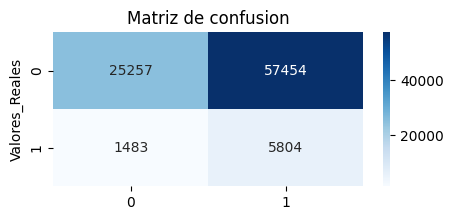

In [ ]:
plt.figure(figsize=(5, 2))    # establecemos la longitud de la grafica

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')        # Graficamos la matriz y colocamos leyendas
# plt.xlabel('Valores_Predecidos')
plt.ylabel('Valores_Reales')
plt.title('Matriz de confusion')
plt.show()

In [ ]:
# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred_labels)
class_report = classification_report(y_test, y_pred_labels)
print("\nExactitud (Accuracy):", accuracy)
print("\nReporte de Clasificación:")
print(class_report)


Exactitud (Accuracy): 0.3451298917753728

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.31      0.46     82711
           1       0.09      0.80      0.16      7287

    accuracy                           0.35     89998
   macro avg       0.52      0.55      0.31     89998
weighted avg       0.88      0.35      0.44     89998



In [ ]:
# Calcular el índice Gini
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1
print(f'Índice Gini: {gini}')
print(f'AUC: {roc_auc}')

Índice Gini: 0.17158676027567688
AUC: 0.5857933801378384


In [ ]:
# Calcular la estadística KS
data = np.vstack([y_test, y_pred_proba]).T
data_pos = data[data[:, 0] == 1][:, 1]
data_neg = data[data[:, 0] == 0][:, 1]
ks_stat, ks_p_value = ks_2samp(data_pos, data_neg)
print(f'Índice KS: {ks_stat}')


Índice KS: 0.12621010727462217


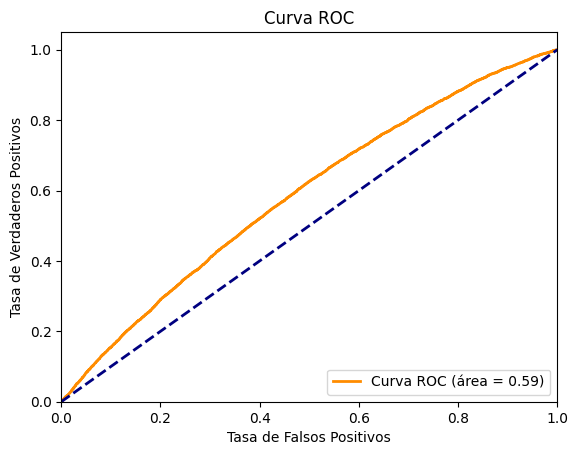

In [ ]:
# Dibujar la curva ROC
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Modelo con el uso de Make_classification

In [ ]:
# Establecer la semilla global para numpy
np.random.seed(13)

# Crear los datos con make_classification
X, y = make_classification(n_samples=299997, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# Definir los hiperparámetros manualmente
manual_params = {
    'iterations': 120,
    'learning_rate': 0.09,
    'depth': 5,
    'l2_leaf_reg': 3,
    'bagging_temperature': 0.5,
    'random_strength': 0.7,
    'random_seed': 42
}

# Crear el modelo CatBoostClassifier con los hiperparámetros manuales
manual_model = CatBoostClassifier(
    iterations=manual_params['iterations'],
    learning_rate=manual_params['learning_rate'],
    depth=manual_params['depth'],
    l2_leaf_reg=manual_params['l2_leaf_reg'],
    bagging_temperature=manual_params['bagging_temperature'],
    random_strength=manual_params['random_strength'],
    class_weights=[1, 8],  # Ajustar los pesos de las clases para penalizar más la clase minoritaria
    random_seed=manual_params['random_seed'],  # agregar semilla aleatoria
    verbose=0
)

# Entrenar el modelo con los hiperparámetros manuales
manual_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_labels = manual_model.predict(X_test)
y_pred_proba = manual_model.predict_proba(X_test)[:, 1]



In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[27935 16946]
 [  923 44196]]


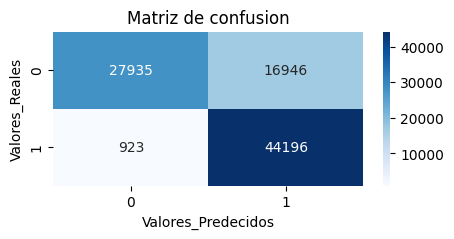

In [ ]:
plt.figure(figsize=(5, 2))    # establecemos la longitud de la grafica

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')        # Graficamos la matriz y colocamos leyendas
plt.xlabel('Valores_Predecidos')
plt.ylabel('Valores_Reales')
plt.title('Matriz de confusion')
plt.show()

In [ ]:
# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_pred_labels)
class_report = classification_report(y_test, y_pred_labels)
print("\nExactitud (Accuracy):", accuracy)
print("\nReporte de Clasificación:")
print(class_report)


Exactitud (Accuracy): 0.8014555555555556

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     44881
           1       0.72      0.98      0.83     45119

    accuracy                           0.80     90000
   macro avg       0.85      0.80      0.79     90000
weighted avg       0.85      0.80      0.79     90000



In [ ]:
# Calcular el índice Gini
roc_aucM = roc_auc_score(y_test, y_pred_proba)
giniM = 2 * roc_aucM - 1
print(f'Índice Gini: {giniM}')
print(f'AUC: {roc_aucM}')

Índice Gini: 0.9283516945127637
AUC: 0.9641758472563818


In [ ]:
# Calcular la estadística KS
data = np.vstack([y_test, y_pred_proba]).T
data_pos = data[data[:, 0] == 1][:, 1]
data_neg = data[data[:, 0] == 0][:, 1]
ks_stat, ks_p_value = ks_2samp(data_pos, data_neg)
print(f'Índice KS: {ks_stat}')

Índice KS: 0.8130351004395345


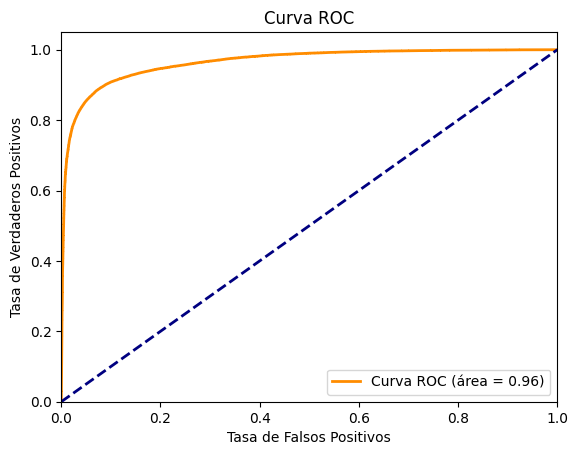

In [ ]:
# Dibujar la curva ROC
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_aucM:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Modelo 4 (Random Forest)

El modelo Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como de regresión, este modelo  combina la salida de múltiples árboles de decisión para alcanzar un solo resultado.

El modelo de random forest se compone de varios árboles de decisión Los árboles de decisión buscan encontrar la mejor división para crear subconjuntos de datos y, por lo general, se entrenan mediante el algoritmo del árbol de clasificación y regresión (CART).Mientras que los árboles de decisión consideran todas las posibles divisiones de características, los bosques aleatorios solo seleccionan un subconjunto de esas características.

## Ventajas


* **Reducción del riesgo de sobreajuste**

Los árboles de decisión individuales tienden a sobreajustarse a los datos de entrenamiento, capturando incluso el ruido de los datos. Sin embargo, un bosque aleatorio, que combina múltiples árboles de decisión, mitiga este problema. Al promediar los resultados de muchos árboles no correlacionados, se reduce la varianza y el riesgo de sobreajuste, mejorando la precisión de las predicciones en datos no vistos.

* **Alta flexibilidad**

El bosque aleatorio es versátil, capaz de manejar tanto tareas de regresión como de clasificación con gran precisión. Además, es eficaz en el manejo de datos faltantes, ya que puede estimar valores perdidos con alta precisión. Esta capacidad de manejar diferentes tipos de tareas y datos lo convierte en una herramienta valiosa para los científicos de datos.

* **Resistencia al ruido**

Gracias a su estructura de múltiples árboles, el bosque aleatorio es menos sensible a datos ruidosos y anomalías. La combinación de múltiples modelos reduce el impacto de valores atípicos en el resultado final.




## Desventajas

* **Proceso computacional intensivo**

Aunque los algoritmos de bosque aleatorio pueden ofrecer predicciones muy precisas, el proceso de construcción y evaluación de un gran número de árboles de decisión es computacionalmente costoso. Esto puede resultar en tiempos de procesamiento más largos, especialmente con conjuntos de datos muy grandes.

* **Mayor consumo de recursos**

El manejo de grandes volúmenes de datos y la construcción de múltiples árboles de decisión requieren una cantidad significativa de memoria y capacidad de almacenamiento. Esto puede ser un desafío en entornos con recursos limitados.

* **Complejidad en la interpretación**

Mientras que un árbol de decisión individual es fácil de interpretar y visualizar, un bosque de muchos árboles es inherentemente más complejo. Esto dificulta la comprensión y explicación de cómo se alcanzan las predicciones finales, lo que puede ser un inconveniente en situaciones donde la interpretabilidad del modelo es crucial.

* **Dificultad en la implementación**

La implementación y ajuste de un modelo de bosque aleatorio puede ser más compleja y requerir más tiempo y experiencia en comparación con modelos más sencillos. Esto puede ser un obstáculo para usuarios con menos experiencia en ciencia de datos o aprendizaje automático.

In [ ]:
# Importa el modelo de clasificación Random Forest de la librería sklearn
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación para modelos de clasificación
from sklearn.metrics import (
    roc_curve,            # Calcula la curva ROC para evaluar el desempeño del modelo
    classification_report, # Genera un reporte de clasificación con precisión, recall, f1-score, etc.
    r2_score,              # Calcula el coeficiente de determinación (R^2) para modelos de regresión
    roc_auc_score,         # Calcula el área bajo la curva ROC (AUC) para evaluar el desempeño del modelo
    mean_squared_error,    # Calcula el error cuadrático medio, útil en modelos de regresión
    accuracy_score,        # Calcula la precisión del modelo
    f1_score,              # Calcula el puntaje F1, la media armónica entre precisión y recall
    confusion_matrix       # Genera una matriz de confusión para evaluar el desempeño del modelo
)

# Utilidades para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Genera un conjunto de datos sintético para problemas de clasificación
from sklearn.datasets import make_classification

# Validación cruzada y optimización de hiperparámetros
from sklearn.model_selection import (
    StratifiedKFold,       # Realiza una validación cruzada estratificada, manteniendo la proporción de clases en cada pliegue
    cross_validate,        # Evalúa métricas de un modelo mediante validación cruzada
    GridSearchCV,          # Realiza una búsqueda exhaustiva de los mejores hiperparámetros usando validación cruzada
    cross_val_score        # Calcula las puntuaciones de validación cruzada para un modelo
)

# Técnicas de remuestreo para manejar desbalanceo en los datos
from imblearn.under_sampling import RandomUnderSampler  # Realiza un submuestreo aleatorio para balancear las clases

from scipy.stats import ks_2samp # Importa el estadistico KS


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.3, random_state=42) # dividimos el conjunto de datos en entrenamiento y prueba

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier()

# Buscamos el Mejor parametro
param_grid = {'n_estimators': range(1,15,3)}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.1096882889967734 for {'n_estimators': 1}


In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1)

# Buscamos el Mejor parametro
param_grid = {'max_depth': [1, 2, 3, 4, 5]}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 5.9007493951731865e-05 for {'max_depth': 3}


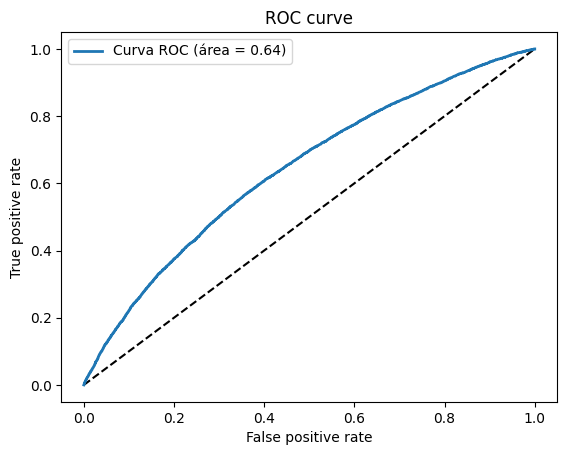

In [ ]:
# Crear y entrenar el modelo de Bosques Aleatorios
rf = RandomForestClassifier(n_estimators=13,max_depth=8, random_state=42)
result = rf.fit(X_train, y_train)

# Predecir las probabilidades de las clases para el conjunto de prueba
y_pred_rf = rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_rf3, tpr_rf3, _ = roc_curve(y_test, y_pred_rf)

# Calcular el AUC (Área bajo la curva)
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Graficar la curva ROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf3, tpr_rf3, lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
y_pred_ = rf.predict(X_test)
# Calcular la AUC
auc = roc_auc_score(y_test, y_pred_rf)

# Calcular el índice de Gini
gini_index = 2 * auc - 1

# Calcular KS
data = np.vstack([y_test, y_pred_]).T
data_pos = data[data[:, 0] == 1][:, 1]
data_neg = data[data[:, 0] == 0][:, 1]

ks_stat, ks_p_value = ks_2samp(data_pos, data_neg)

print(f"Índice de Gini: {gini_index}")
print(f"Índice de AUC: {auc}")
print(f"Índice de KS: {ks_stat}")

Índice de Gini: 0.2816822842373423
Índice de AUC: 0.6408411421186712
Índice de KS: 0.0


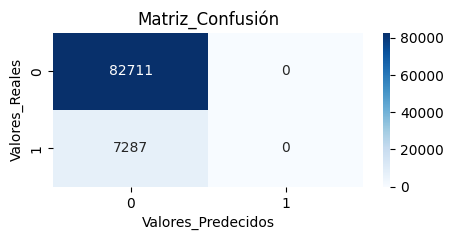

In [ ]:
from sklearn.metrics import confusion_matrix      # importamos la matriz de confusion

cm = confusion_matrix(y_test, y_pred_)

plt.figure(figsize=(5, 2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores_Predecidos')
plt.ylabel('Valores_Reales')
plt.title('Matriz_Confusión')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     82711
           1       0.00      0.00      0.00      7287

    accuracy                           0.92     89998
   macro avg       0.46      0.50      0.48     89998
weighted avg       0.84      0.92      0.88     89998



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo con Make_Classification

In [ ]:
X, y = make_classification(n_samples=80000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,  random_state=42)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.5,  random_state=42)

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier()

# Buscamos el Mejor parametro
param_grid = {'n_estimators': range(1,15,3)}


kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.914791400370469 for {'n_estimators': 13}


In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=13)

# Buscamos el Mejor parametro
param_grid = {'max_depth': [1, 2, 3, 4, 5]}


kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.9149898999196013 for {'max_depth': 5}


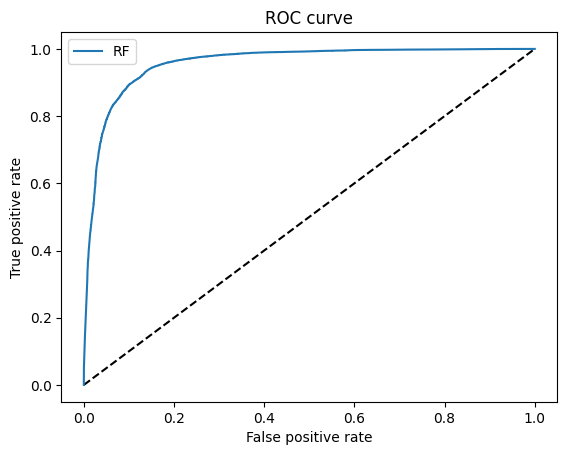

In [ ]:

# Número de árboles en el bosque aleatorio
n_estimator = 13

# Generar un conjunto de datos sintético
X, y = make_classification(n_samples=80000, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Dividir el conjunto de entrenamiento en dos para entrenamiento adicional (si es necesario)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de Bosques Aleatorios
rf = RandomForestClassifier(max_depth=5, n_estimators=n_estimator, random_state=42)
result = rf.fit(X_train, y_train)

# Predicción con el modelo de Bosques Aleatorios
y_pred_2 = rf.predict(X_test)
y_pred_rf = rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_rf4, tpr_rf4, _ = roc_curve(y_test, y_pred_rf)

# Graficar la curva ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf4, tpr_rf4, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
y_pred_2 = rf.predict(X_test)

# Calcular la AUC
auc = roc_auc_score(y_test, y_pred_rf)

# Calcular el índice de Gini
gini_index = 2 * auc - 1

# Calcular KS
data = np.vstack([y_test, y_pred_rf]).T
data_pos = data[data[:, 0] == 1][:, 1]
data_neg = data[data[:, 0] == 0][:, 1]

ks_stat, ks_p_value = ks_2samp(data_pos, data_neg)

print(f"Índice de Gini: {gini_index}")
print(f"Índice de AUC: {auc}")
print(f"Índice de KS: {ks_stat}")

Índice de Gini: 0.9149838273485447
Índice de AUC: 0.9574919136742723
Índice de KS: 0.7954253365882803


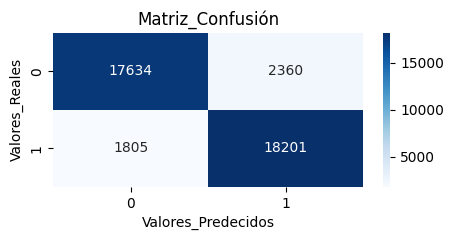

In [ ]:
from sklearn.metrics import confusion_matrix      # importamos la matriz de confusion

cm_knn = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(5, 2))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores_Predecidos')
plt.ylabel('Valores_Reales')
plt.title('Matriz_Confusión')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     19994
           1       0.89      0.91      0.90     20006

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



##Conclusiones

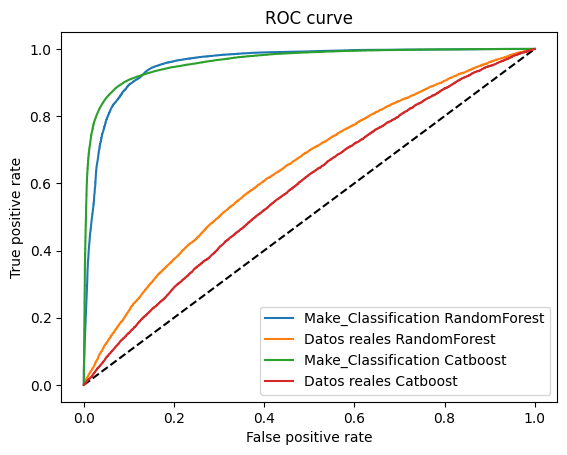

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf4, tpr_rf4, label='Make_Classification RandomForest')
plt.plot(fpr_rf3, tpr_rf3, label='Datos reales RandomForest')
plt.plot(fpr2, tpr2, label='Make_Classification Catboost')
plt.plot(fpr1, tpr1, label='Datos reales Catboost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Nuestro proyecto se enfrento a un factor que no sabíamos como regularlo satisfactoriamente "el sobreajuste de las V.A.s" que estuvieron ocasionando daños a las predicciones y la eficiencia de nuestro modelos predictivos. Una vez realizado esto, obtuvimos buenos modelos como lo fue RandomForestClassifier y CatBoostClassifier, donde se lograr apreciar como se comportan una vez realizado los sobreajustes ya mencionados. Los cuales nos ayudaron a contestar nuestra pregunta: ¿Por qué los clientes no pagan? y con esto, poder mejorar el préstamo a un cierto grupo de clientes.

##**Bibliografía**




*   Mejía, M. A. (2017). El diagrama de pareto rediseñado.
*   Arruñada, B., Casas-Arce, P., & Ganuza, J. J. (2018). Préstamos hipotecarios y limitaciones al tipo de interés. Presente y futuro del mercado hipotecario español: un análisis económico y jurídico, 285-314.


